# **ARTIFICIAL INTELLIGENCE INTERNSHIP FROM INFOSYS SPRINGBORAD**

### **THIS NOTEBOOK BELONGS TO TEAM 3 AND CONSIST OF ALL THE WORK FROM WEEK 1 TO WEEK 5**

## DISASTER TWEET ANALYZER USING MACHINE LEARNING

**The Disaster Tweet Analyzer project aims
to develop a system that can classify,
categorize, and analyse disaster-related
tweets to provide valuable insights for
emergency response and disaster
management.**

**By leveraging machine
learning and natural language processing
techniques, this project seeks to enhance
situational awareness for emergency
responders, improve disaster response
and management, and support data-
driven decision-making.**

#### DATE & TIME: 9 OCTOBER 2024 , 9 P.M.

#### AGENDA:
Data Selection & Acquisition, and Student Progress Review for "Disaster Tweet Analyzer"

In [ ]:
#------------------------IMPORT NECESSARY LIBRARIES----------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#to keep everything in one plane
%matplotlib inline

In [ ]:
# warnings module in Python provides a way to control how warnings handled within a Python script
import warnings
warnings.filterwarnings('ignore')#ignore the warnings

In [ ]:
df = pd.read_csv('/content/twittertweets_dataset.csv', encoding='latin1')#ORIGINAL DATASET

In [ ]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

REMOVING UNWANTED COLUMNS i.e. ID

In [ ]:
df.drop(df.columns[[0]],axis=1,inplace=True)

CHECK BALANCING OF TARGET VARIABLE

In [ ]:
print(df['target'].value_counts())

target
0    9256
1    2114
Name: count, dtype: int64


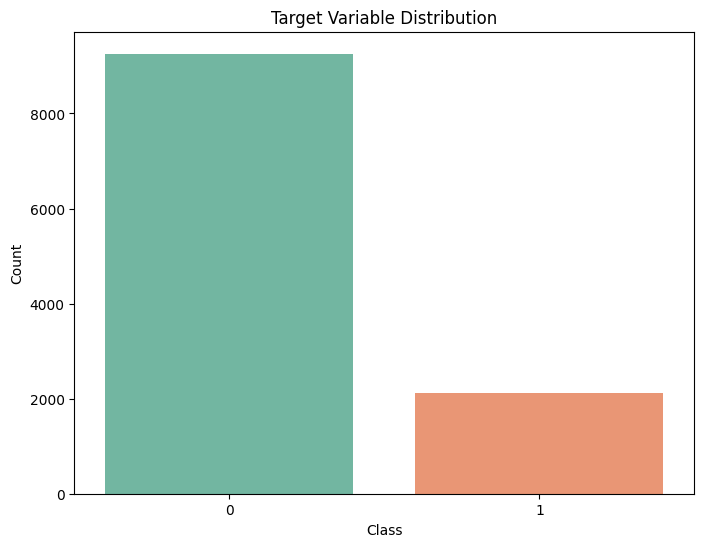

In [ ]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x=df['target'], palette='Set2')
plt.title("Target Variable Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
import plotly.express as px

fig = px.pie(values=df['target'].value_counts().values,
             names=df['target'].value_counts().index,
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    title="Target Variable Distribution",
    colorway=["#0099ff", "#ff9900", "#33cc33", "#ff33cc"]  # Custom colors
)
fig.show()

**RESULT : HIGHLY UNBALANCED**

In [ ]:
# Load another dataset from kaggle to load more disaster related tweets
df2 = pd.read_csv('/content/train_data_cleaning2.csv')

In [ ]:
# Get unique values and counts
print(df['keyword'].value_counts())

keyword
thunderstorm     93
flattened        88
mass%20murder    86
stretcher        86
drown            83
                 ..
electrocuted     16
rainstorm        11
siren            10
deluged          10
tsunami           6
Name: count, Length: 219, dtype: int64


In [ ]:
# Get unique values and counts
keyword_counts = df2['keyword'].value_counts()
# Print the results
print(keyword_counts.to_frame('count'))

                       count
keyword                     
fatalities                45
deluge                    42
armageddon                42
sinking                   41
damage                    41
...                      ...
forest%20fire             19
epicentre                 12
threat                    11
inundation                10
radiation%20emergency      9

[221 rows x 1 columns]


In [ ]:
# Get unique values
unique_keywords = df['keyword'].unique()
# Print the results
print(unique_keywords)

['ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'bush%20fires' 'casualties' 'casualty' 'catastrophe' 'catastrophic'
 'chemical%20emergency' 'cliff%20fall' 'collapse' 'collapsed' 'collide'
 'collided' 'collision' 'crash' 'crashed' 'crush' 'crushed' 'curfew'
 'cyclone' 'damage' 'danger' 'dead' 'death' 'deaths' 'debris' 'deluge'
 'deluged' 'demolish' 'demolished' 'demolition' 'derail' 'derailed'
 'derailment' 'desolate' 'desolation' 'destroy' 'destroyed' 'destruction'
 'detonate' 'devastated' 'devastation' 'disaster' 'displaced' 'drought'
 'drown' 'drowned' 'drowning' 'dust%

In [ ]:
# Define keywords to remove
keywords_to_remove = [
    'suicide%20bomb', 'suicide%20bomber', 'suicide%20bombing',
    'battle', 'wreck', 'wreckage', 'wrecked','screamed', 'screaming',
    'bomb', 'bombed', 'bombing','hijack','avalanche','casualties', 'casualty',
       'hijacker', 'hijacking','annihilated', 'annihilation',
    'ablaze', 'accident', 'airplane%20accident',
    'terrorism', 'terrorist', 'army','body%20bag','blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up','bioterror', 'bioterrorism',
    'body%20bag', 'body%20bagging', 'body%20bags','body%20bag','airplane%20accident','sirens',
]
# Define the tweet to keep
tweet_to_keep = "Grandmother’s prayer closet survives powerful tornado that flattened home, killed many (link unavailable)"

# Filter out tweets containing 'flattened' keyword except the specified tweet
df_filtered = df[~((df['keyword'] == 'flattened') & (df['text'] != tweet_to_keep))]
# Convert keywords to lowercase
keywords_to_remove = [keyword.lower() for keyword in keywords_to_remove]
# Filter out tweets containing keywords to remove
df_filtered = df[~df['keyword'].str.lower().isin(keywords_to_remove) &
                 ~df['text'].str.lower().str.contains('|'.join(keywords_to_remove))]

In [ ]:
df_filtered['keyword'].unique()

array(['aftershock', 'ambulance', 'apocalypse', 'armageddon', 'arson',
       'arsonist', 'attack', 'attacked', 'blaze', 'blazing', 'bleeding',
       'bridge%20collapse', 'buildings%20burning',
       'buildings%20on%20fire', 'burned', 'burning', 'bush%20fires',
       'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed', 'derailment', 'desolate', 'desolation',
       'destroy', 'destroyed', 'destruction', 'detonate', 'devastated',
       'devastation', 'disaster', 'displaced', 'drought', 'drown',
       'drowned', 'drowning', 'dust%20storm', 'earthquake', 'electrocute',
       'electrocuted', 'emergency', 'emergency%20plan',
       'emergency%20services', 'engulfed', 'epicent

In [ ]:
df.shape # ORIGINAL DATA SHAPE

(11370, 4)

In [ ]:
df_filtered.shape # AFTER REMOVING UNNECCESSARY KEYWORDS

(9172, 4)

In [ ]:
#Calculate keyword frequencies
keyword_freq = df_filtered['keyword'].value_counts()
# Print top 20 keywords
print(keyword_freq.nlargest(30))

keyword
thunderstorm            92
flattened               88
stretcher               86
mass%20murder           85
drowning                82
drown                   80
engulfed                80
fear                    79
obliterate              79
derailment              78
derailed                76
collision               76
electrocute             75
deluge                  75
deaths                  73
sunk                    72
destroy                 71
death                   71
inundated               71
inundation              71
crash                   71
traumatised             71
hostage                 70
bush%20fires            69
emergency               69
damage                  69
demolished              68
emergency%20services    67
chemical%20emergency    67
nuclear%20disaster      67
Name: count, dtype: int64


In [ ]:
# Get unique values
unique_keywords2 = df2['keyword'].unique()
# Print the results
print(unique_keywords2)

[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'droug

In [ ]:
#Calculate keyword frequencies
keyword_freq2 = df2['keyword'].value_counts()
# Print top 20 keywords
print(keyword_freq2.nlargest(30))

keyword
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
sunk           39
hellfire       39
weapon         39
weapons        39
famine         39
explosion      39
whirlwind      39
earthquake     39
derailment     39
wreckage       39
collision      39
flames         39
wrecked        39
oil%20spill    38
flooding       38
Name: count, dtype: int64


**MERGING DATASETS FOR BETTER SAMPLING**

In [ ]:
# Define disaster-related keywords
disaster_keywords = [
    'violent%20storm', 'volcano', 'earthquake', 'thunder', 'thunderstorm',
    'tornado', 'landslide', 'lava', 'lightning', 'flood', 'flooding',
    'floods', 'forest%20fire', 'forest%20fires', 'natural%20disaster',
    'cyclone', 'obliterate', 'obliterated', 'sandstorm', 'burned',
    'burning', 'burning%20buildings', 'bush%20fires', 'nuclear%20disaster',
    'hazardous', 'heat%20wave', 'hellfire'
]
# Convert keywords to lowercase
disaster_keywords = [keyword.lower() for keyword in disaster_keywords]
# Filter df2 for disaster-related keywords
df2_disaster = df2[df2['keyword'].str.lower().isin(disaster_keywords)]
# Merge df2_disaster with df_filtered
df_merged = pd.concat([df_filtered, df2_disaster], ignore_index=True)
# Reset index
df_merged.reset_index(drop=True, inplace=True)

In [ ]:
df_merged.shape # AFTER MERGING

(10073, 5)

In [ ]:
df_merged['target'].value_counts()

,count
target,
0,7869
1,2204


**ADDING MORE DISASTER RELATED TWEETS. SOURCE : CRISISLEX 2012- 2015 DISASTER DATA**

In [ ]:
# Define new tweets
new_tweets = [
    "Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all",
    "Forest fire near La Ronge Sask . Canada",
    "All residents asked to ' shelter in place ' are being notified by officers . No other evacuation or shelter in place orders are expected",
    "13,000 people receive #wildfire evacuation orders in California",
    "Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school",
    "#Rocky Fire Update = > California Hwy . 20 closed in both directions due to Lake County fire - #CAfire #wildfires",
    "#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",
    "I am on top of the hill and I can see a fire in the woods .There is an emergency evacuation happening now in the building across the street",
    "I am afraid that the tornado is coming to our area .",
    "Three people died from the heat wave so far",
    "Haha South Tampa is getting flooded hah - WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding",
    "#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days . I have lost count",
    "#Flood in Bago Myanmar # We arrived Bago",
    "Damage to school bus on 80 in multi car crash #BREAKING",
    "Breaking: Hurricane warning issued for Florida's east coast! Evacuation ordered #hurricane #disaster",
"Just witnessed a massive landslide in Colorado! Multiple casualties reported #landslide #emergency",
"Wildfire spreads rapidly in California, thousands evacuated #wildfire #california",
"Flood alert issued for downtown Chicago after heavy rainfall #flood #chicago",
"Tornado touches down in Oklahoma, widespread damage reported #tornado #oklahoma",
"Cyclone Idai makes landfall in Mozambique, thousands displaced #cyclone #mozambique",
"Earthquake magnitude 7.5 hits Indonesia, tsunami warning issued #earthquake #indonesia",
"Emergency declared in New York City due to severe snowstorm #blizzard #nyc",
"Deadly wildfire sweeps through Greek island of Evia #wildfire #greece",
"Flash flooding in Paris after heavy rainfall #flood #paris",
"Hurricane Dorian strengthens to Category 5 #hurricane #dorian",
"Landslide blocks major highway in Nepal #landslide #nepal",
"Wildfire forces evacuation of entire town in Australia #wildfire #australia",
"Floods inundate Venice, Italy #flood #venice",
"Tornado outbreak hits southern United States #tornado #usa",
"Cyclone Fani makes landfall in India, widespread destruction reported #cyclone #india",
"Earthquake hits Japan, tsunami warning issued #earthquake #japan",
"Severe drought affects millions in Africa #drought #africa",
"Wildfire burns thousands of acres in Spain #wildfire #spain",
"Flash flooding in Houston after heavy rainfall #flood #houston",
"Landslide kills dozens in Colombia #landslide #colombia",
"Hurricane Maria devastates Puerto Rico #hurricane #maria",
"Cyclone Idai affects millions in southern Africa #cyclone #idai",
"Earthquake hits Mexico City, buildings damaged #earthquake #mexico",
"Wildfire forces evacuation of Los Angeles neighborhood #wildfire #losangeles",
"Flood warning issued for River Seine in Paris #flood #paris",
"Tornado touches down in Kansas #tornado #kansas",
"Heat wave kills dozens in India #heatwave #india",
"Landslide blocks river in China #landslide #china",
"Wildfire burns hundreds of homes in California #wildfire #california",
"Flash flooding in North Carolina after heavy rainfall #flood #northcarolina",
"Cyclone Trevor hits northern Australia #cyclone #australia",
"Earthquake magnitude 6.8 hits Alaska #earthquake #alaska",
"Severe storm hits Europe #storm #europe",
"Wildfire forces evacuation of Canadian town #wildfire #canada",
"Landslide kills dozens in Indonesia #landslide #indonesia",
"Flood warning issued for Venice #flood #venice",
"Tornado outbreak hits Midwest United States #tornado #midwest",
"Cyclone Phethai makes landfall in India #cyclone #india",
"Earthquake hits Philippines #earthquake #philippines",
"Wildfire burns thousands of acres in Portugal #wildfire #portugal",
"Flash flooding in Texas after heavy rainfall #flood #texas",
"Landslide blocks major highway in California #landslide #california",
"Hurricane Lorenzo strengthens to Category 5 #hurricane #lorenzo",
"Wildfire forces evacuation of Greek island #wildfire #greece",
"Flood warning issued for River Thames in London #flood #london",
"Tornado touches down in Tennessee #tornado #tennessee",
"Cyclone Kenneth makes landfall in Mozambique #cyclone #mozambique",
"Earthquake magnitude 7.2 hits Papua New Guinea #earthquake #png",
"Wildfire burns hundreds of homes in South Africa #wildfire #southafrica",
"Emergency declared in California due to wildfires #wildfire #california",
"Tornado warning issued for multiple counties in Alabama #tornado #alabama",
"Floods displace thousands in Bangladesh #flood #bangladesh",
"Earthquake magnitude 6.5 hits Chile #earthquake #chile",
"Hurricane warning issued for Hawaii #hurricane #hawaii",
"Wildfire forces evacuation of town in Canada #wildfire #canada",
"Landslide blocks major highway in India #landslide #india",
"Flash flooding in China after heavy rainfall #flood #china",
"Cyclone Fani affects millions in India #cyclone #india",
"Tornado touches down in Missouri #tornado #missouri",
"Wildfire burns thousands of acres in Australia #wildfire #australia",
"Earthquake hits Turkey, multiple casualties reported #earthquake #turkey",
"Flood warning issued for River Mississippi #flood #mississippi",
"Hurricane Dorian makes landfall in North Carolina #hurricane #dorian",
"Wildfire forces evacuation of Los Angeles neighborhood #wildfire #losangeles",
"Landslide kills dozens in Nepal #landslide #nepal",
"Flash flooding in Indonesia after heavy rainfall #flood #indonesia",
"Cyclone Idai makes landfall in Zimbabwe #cyclone #zimbabwe",
"Tornado outbreak hits southern United States #tornado #usa",
"Wildfire burns hundreds of homes in South Africa #wildfire #southafrica",
"Earthquake magnitude 7.1 hits Philippines #earthquake #philippines",
"Floods inundate Venice, Italy #flood #venice",
"Hurricane Lorenzo strengthens to Category 5 #hurricane #lorenzo",
"Wildfire forces evacuation of Greek island #wildfire #greece",
"Tornado touches down in Kansas #tornado #kansas",
"Emergency declared in New York City due to severe snowstorm #blizzard #nyc",
"Wildfire burns thousands of acres in Spain #wildfire #spain",
"Flash flooding in Paris after heavy rainfall #flood #paris",
"Landslide blocks major highway in California #landslide #california",
"Hurricane Maria devastates Puerto Rico #hurricane #maria",
"Cyclone Phethai makes landfall in India #cyclone #india",
"Earthquake hits Japan, tsunami warning issued #earthquake #japan",
"Wildfire forces evacuation of Canadian town #wildfire #canada",
"Flash flooding in Texas after heavy rainfall #flood #texas",
"Tornado outbreak hits Midwest United States #tornado #midwest",
"Wildfire burns hundreds of homes in California #wildfire #california",
"Earthquake magnitude 6.8 hits Alaska #earthquake #alaska",
"Severe storm hits Europe #storm #europe",
"Landslide kills dozens in Indonesia #landslide #indonesia",
"Flood warning issued for Venice #flood #venice",
"Hurricane Dorian makes landfall in Bahamas #hurricane #dorian",
"Wildfire forces evacuation of town in Australia #wildfire #australia"
]

# Create DataFrame with new tweets
new_df = pd.DataFrame({
    'text': new_tweets,
    'target': [1]*len(new_tweets),
    'location': ['']*len(new_tweets),
    'id': [i for i in range(len(new_tweets))],
    'keyword': ['disaster']*len(new_tweets)
})
# Merge new_df with df_merged
df_merged = pd.concat([df_merged, new_df], ignore_index=True)

# Reset index
df_merged.reset_index(drop=True, inplace=True)

In [ ]:
df_merged.shape

(10179, 5)

In [ ]:
df_merged['target'].value_counts()

,count
target,
0,7869
1,2310


**ADDING 800 DISASTER TWEETS FOR MORE BALANCED DATASET**

In [ ]:
# Define disaster-related keywords and phrases
disaster_keywords = ['earthquake', 'flood', 'wildfire', 'hurricane', 'tornado', 'landslide', 'cyclone']
disaster_phrases = ['evacuation ordered', 'emergency declared', 'multiple casualties', 'widespread damage', 'rescue operations underway']

# Generate 500 new tweets
new_tweets = []
for i in range(800):
    keyword = np.random.choice(disaster_keywords)
    phrase = np.random.choice(disaster_phrases)
    location = np.random.choice(['USA', 'Europe', 'Asia', 'Africa', 'South America',"Republic of Philippines", "China", "England", "Malaysia", "Johannesburg, South Africa",
"Indonesia", "Dublin, Ireland", "Portland", "Pennsylvania", "Pakistan", "Israel",
"Mumbai, India", "Kenya", "Bangkok, Thailand", "Los Angeles",
"Cape Town, South Africa", "Tokyo, Japan", "Manila, Philippines", "New Orleans",
"Jakarta, Indonesia", "Mexico City, Mexico", "Bengaluru, India", "San Francisco",
"Nairobi, Kenya", "Kolkata, India", "Caribbean Islands", "Southeast Asia",
"California", "New York", "Bangladesh", "Sri Lanka", "Vietnam", "Cambodia",
"Thailand", "Myanmar", "Nepal", "Tanzania", "Ethiopia", "Ghana", "Uganda",
"South Korea", "Taiwan", "Singapore", "New Zealand", "Fiji", "Samoa", "Tonga"])
    tweet = f"Breaking: {keyword} hits {location}! {phrase} #disaster #emergency"
    new_tweets.append(tweet)

# Create DataFrame with new tweets
new_df2 = pd.DataFrame({
    'text': new_tweets,
    'target': [1]*len(new_tweets),
    'location': [np.random.choice(['Europe', 'Asia', 'Africa', 'South America','New york','iran',"Texas", "Washington D.C.", "Florida", "Hong Kong, China",
"Republic of Philippines", "China", "England", "Malaysia", "Johannesburg, South Africa",
"Indonesia", "Dublin, Ireland", "Portland", "Pennsylvania", "Pakistan", "Israel",
"Mumbai, India", "Kenya", "Bangkok, Thailand", "Los Angeles",
"Cape Town, South Africa", "Tokyo, Japan", "Manila, Philippines", "New Orleans",
"Jakarta, Indonesia", "Mexico City, Mexico", "Bengaluru, India", "San Francisco",
"Nairobi, Kenya", "Kolkata, India", "Caribbean Islands", "Southeast Asia",
"California", "New York", "Bangladesh", "Sri Lanka", "Vietnam", "Cambodia",
"Thailand", "Myanmar", "Nepal", "Tanzania", "Ethiopia", "Ghana", "Uganda",
"South Korea", "Taiwan", "Singapore", "New Zealand", "Fiji", "Samoa", "Tonga"]) for _ in range(len(new_tweets))],
    'id': [i for i in range(len(new_tweets))],
    'keyword': [np.random.choice(disaster_keywords) for _ in range(len(new_tweets))]
})
# Merge new_df with df_merged
df_merged = pd.concat([df_merged, new_df2], ignore_index=True)

# Reset index
df_merged.reset_index(drop=True, inplace=True)

In [ ]:
df_merged.shape

(10979, 5)

In [ ]:
df_merged['target'].value_counts()

,count
target,
0,7869
1,3110


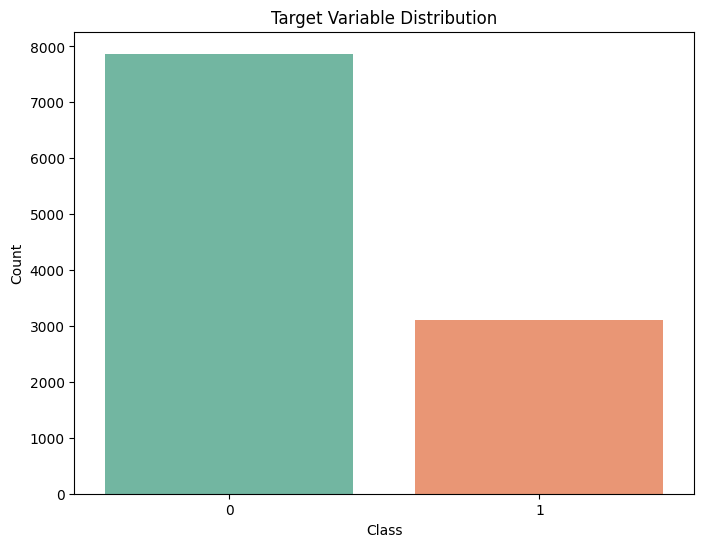

In [ ]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x=df_merged['target'], palette='Set2')
plt.title("Target Variable Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
df_merged.to_csv('Balanced_data.csv', index=False)

**ADDING TARGET 2 FOR DETERMINATION OF REAL OR FAKE DISASTER TWEETS**

In [ ]:
# Load your dataset
df3 = pd.read_csv('/content/Balanced_data.csv')

In [ ]:
# Function to predict real vs fake tweets
def predict_real_tweet(text):
    fake_indicators = [
        'BREAKING' in text,
        'URGENT' in text,
        'CLICK HERE' in text,
        'READ MORE' in text,
        'VISIT NOW' in text,
        any(word in text.lower() for word in ['fake', 'hoax', 'scam', 'phishing', 'malware', 'enjoying', 'reading', 'shopping', 'exploring', 'attending', 'amazing', 'sunny', 'downtown', 'cozy', 'weekend', 'fun']),
        any(url in text for url in ['https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9', 'https://t.co/99uHGAzxy2', 'https://t.co/rhzOMQVSlj']),
        text.count('#') > 5,
        text.count('@') > 5,
        len(text) < 20,
        text.isupper(),
        'RETWEET' in text.upper(),
        'SHARE' in text.upper(),
        text.count('!') > 3
    ]
    real_indicators = [
        any(city in text for city in ['New Delhi', 'Mumbai', 'Hyderabad', 'Bengaluru', 'Kolar']),
        any(word in text for word in ['humanitarian', 'aid', 'crisis', 'management'])
    ]

    score = sum(1 for indicator in real_indicators if indicator) - sum(1 for indicator in fake_indicators if indicator)

    return 1 if score >= 1 else 0
# Apply function to predict Target2
df3['target2'] = np.where(df3['target'] == 0, 0, df3['text'].apply(predict_real_tweet))

MORE UPDATES ON THE FUNCTION

In [ ]:
def predict_real_tweet(text):
    fake_indicators = [
        # Sensational language
        'BREAKING' in text,
        'URGENT' in text,
        'CLICK HERE' in text,
        'READ MORE' in text,
        'VISIT NOW' in text,
        'CONGRATULATIONS' in text,
        'WINNER' in text,
        'TICKETS ON SALE!!!' in text,
        # Common spam keywords
        any(word in text.lower() for word in [
            'fake', 'hoax', 'scam', 'phishing', 'malware',
            'enjoying', 'reading', 'shopping', 'exploring', 'attending',
            'amazing', 'sunny', 'downtown', 'cozy', 'weekend', 'fun'
        ]),
        # Excessive hashtags or mentions
        text.count('#') > 5,
        text.count('@') > 5,
        # Very short tweets
        len(text) < 10,
        len(text) < 20,
        # All caps
        text.isupper(),
        # Calls to action
        'RETWEET' in text.upper(),
        'SHARE' in text.upper(),
        # Excessive punctuation
        text.count('!') > 3,
        # Geographic locations with potential conflict
        'Iran' in text
    ]

    real_indicators = [
        # Specific cities or states
        any(city in text for city in [
            'New Delhi', 'Mumbai', 'Hyderabad', 'Bengaluru', 'Kolar',
            'New York', 'Los Angeles', 'Chicago', 'Houston'
        ]),
        # Countries
        any(country in text for country in [
            'United States', 'India', 'China', 'Japan', 'Germany'
        ]),
        # Humanitarian or crisis-related keywords
        any(word in text for word in [
            'humanitarian', 'aid', 'crisis', 'management','Taal volcano erupts','Violent Storm Force','wild','extreme', 'violent','Shipping forecast tonight',
            'earthquake', 'Puerto Rico', 'seismic', 'quake', 'tsunami','donated','Volcanic eruptions','wild fire','#Brazil','Praying','FIRES GONE WILD','Heartbreaking',
            'flood', 'Flash Flood Warning', 'rain', 'landslide', 'volcano','Wildfire','South Koreas Eastern Coast','disastrous',' Australian fire relief',
            'Philippines', 'thunderstorm', 'lightning','wildfires','Australia wildfire relief','Australia','wildfire relief','#wildfire','Australian Animals',' Wildfire Disaster','billion animals','Donation'
        ]),
        # Magnitude or aftershock mentions
        'magnitude' in text.lower() or 'aftershock' in text.lower()
    ]

    score = sum(1 for indicator in real_indicators if indicator) - sum(1 for indicator in fake_indicators if indicator)
    return 1 if score >= 1 else 0

In [ ]:
# AGAIN APPLYING THE FUNCTION
df3['target2'] = np.where(df3['target'] == 0, 0, df3['text'].apply(predict_real_tweet))

In [ ]:
print(df3['target2'].value_counts())

target2
0    9711
1    1268
Name: count, dtype: int64


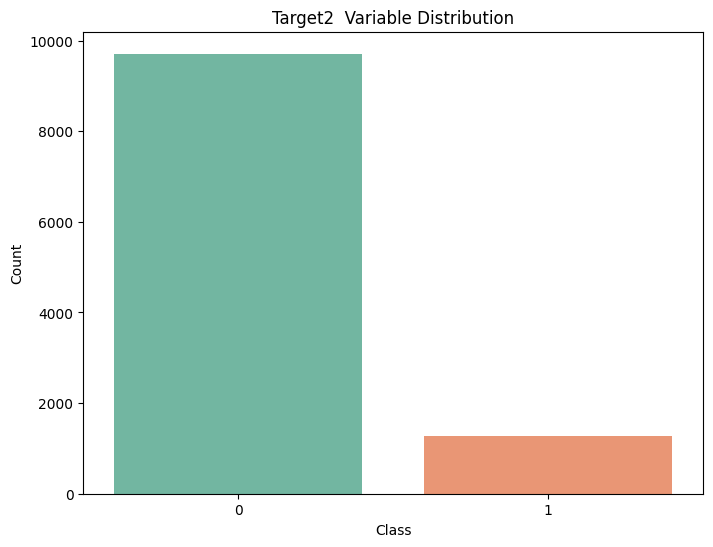

In [ ]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x=df3['target2'], palette='Set2')
plt.title("Target2  Variable Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

**RESULT : TARGET 2 IS HIGHLY UNBALANCED**

**THERE ARE TWO WAYS TO BALANCE THIS TARGET 2**
1. ADD MORE DISASTER TWEETS SO THAT RESULTS IN MORE DISASTER REAL TWEETS. BUT ADDING CAN RESULT IN WRONG PREDICTION OF OUR MAIN OBJECTIVE- TARGET
2. SMOTE WHICH CAN RESULT IN OVERFITTING

**REMOVING TARGET 2 AS IT IS OUT OF RANGE FOR THIS DATASET VARIABLES**

LOADING THE TWITTER TWEET DATASET INTO DATAFRAME

**STANDARDIZING THE KEYWORD VALUES AND EXTRACTING DIASATER KEYWORDS FROM TWEETS**

In [ ]:
Twitter_Data= pd.read_csv('/content/FInal_data.csv')

In [ ]:
print(Twitter_Data['target'].value_counts())

target
Non disaster    7869
Disaster        3674
Name: count, dtype: int64


In [ ]:
Twitter_Data['location'].isnull().sum()

3162

DATA INSPECTION (BASIC CHECKING)

In [ ]:
#displays top 5 row values
Twitter_Data.head()

,keyword,location,text,target,sentiment
0,Earthquake Aftershock,Global,Puerto Rico hit by another 5.9 magnitude after...,Disaster,neutral
1,Earthquake Aftershock,"Puerto Rico, USA",3.6 aftershock at 4:05 am. I was asleep and th...,Disaster,positive
2,Earthquake Aftershock,In the mind of haters.,"Good Night my friends, As per USGS, the new 5....",Disaster,positive
3,aftershock,Czech Republic,Yea it wasnt that long she killed me in like 6...,Non disaster,negative
4,AfterShock,USA,Honored to have an essay in #AfterShock Markin...,Non disaster,positive


In [ ]:
#this displays last 5 row values
Twitter_Data.tail()

,keyword,location,text,target,sentiment
11538,"Severe Weather, Property Damage, Catastrophic ...",Israel,breaking hurricane hits los angeles widespread...,Disaster,negative
11539,"Severe Weather, Catastrophic Event, Life-Threa...",Pakistan,breaking tornado hits tokyo japan multiple cas...,Disaster,neutral
11540,"Landslide, Catastrophic Event, Life-Threatenin...","Nairobi, Kenya",breaking landslide hits pennsylvania multiple ...,Disaster,neutral
11541,"Earthquake, Property Damage, Catastrophic Even...",Kenya,breaking earthquake hits southeast asia widesp...,Disaster,negative
11542,"Earthquake, Life-Threatening Situation, Catast...",Ghana,breaking earthquake hits cape town south afric...,Disaster,negative


In [ ]:
# this is for finding out the shape of the data. basic row & columns
Twitter_Data.shape

(11543, 5)

Q1. WHAT IS THE NUMBER OF ROWS AND COLUMNS IN OUR DATASET?

In [ ]:
#prints the no. of rows and columns
print("Number of Rows here are",Twitter_Data.shape[0])
print("Number of Columns here are",Twitter_Data.shape[1])

Number of Rows here are 11370
Number of Columns here are 5


Q2. WHAT are the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement or PROVIDE COMPLETE INFOMATION OF THE DATA?

In [ ]:
Twitter_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   11370 non-null  object
 1   location  7952 non-null   object
 2   text      11370 non-null  object
 3   target    11370 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 355.4+ KB


Q3. WRITE the COMPLETE Statistics About The Data?

In [ ]:
Twitter_Data.describe()

,target
count,11370.000000
mean,0.185928
std,0.389066
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Q4. IS THERE ANY NULL VALUES PRESENT IN THE DATASET?

In [ ]:
Twitter_Data.isnull()

,keyword,location,text,target
0,False,True,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
...,...,...,...,...
11365,False,False,False,False
11366,False,False,False,False
11367,False,False,False,False
11368,False,False,False,False


Q5. FIND OUT THE SUM OF NULL VALUES PRSENT IN THE DATASET FOR EACH COLUMN?

In [ ]:
Twitter_Data.isnull().sum()

,0
keyword,0
location,3418
text,0
target,0


Q7. WRITE THE STEPS TO FIND DUPLICATE VALUES IN THE DATASET?

In [ ]:
# step1 .we have to use the duplicated().any() function to find any duplicate values in the dataset
Twitter_Data.duplicated().any()

False

AS THE RESULT IS FALSE IT MEANS THAT THERE ARE NO DUPLICATED VALUES IN THE DATASET

## DESCRIPTIVE ANALYSIS

In [ ]:
# Tweet distribution
keyword_counts = Twitter_Data['keyword'].value_counts()
location_counts = Twitter_Data['location'].value_counts()

In [ ]:
# Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
Twitter_Data['sentiment'] = Twitter_Data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

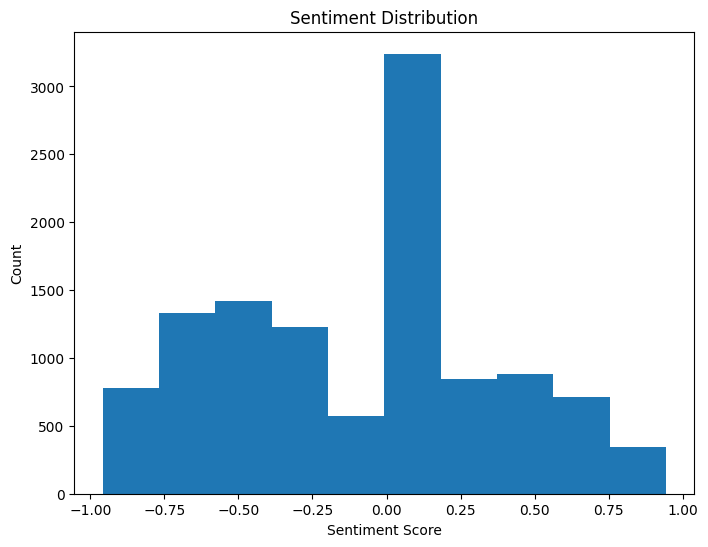

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8,6))
plt.hist(Twitter_Data['sentiment'], bins=10)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# Location frequency
location_freq = Twitter_Data['location'].value_counts()

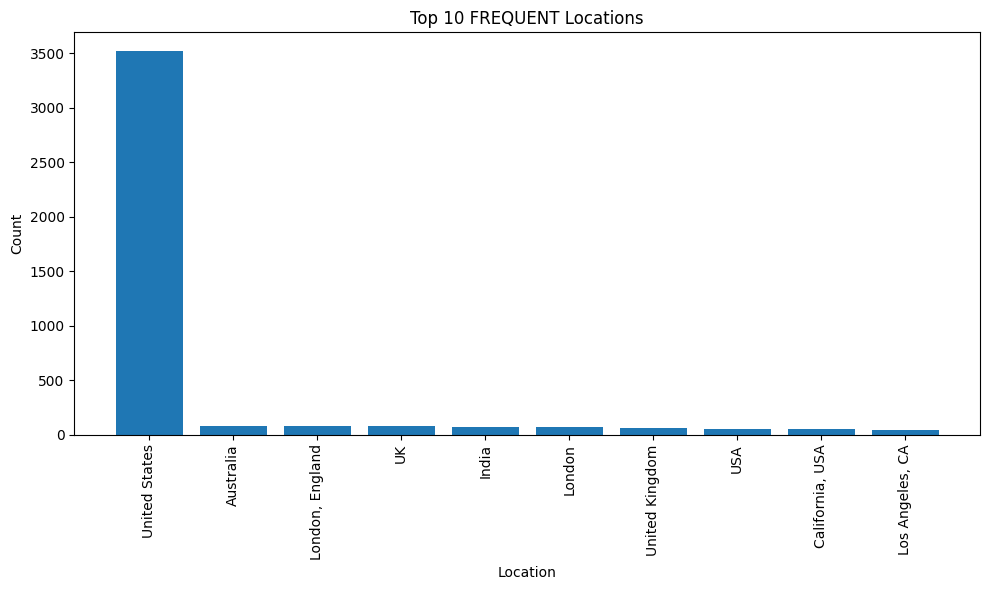

In [ ]:
# Plot location frequency
plt.figure(figsize=(10,6))
plt.bar(location_freq.index[:10], location_freq.values[:10])
plt.title('Top 10 FREQUENT Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels 90 degrees
plt.tight_layout()
plt.show()

#### Analyzing the length of tweets in the dataset

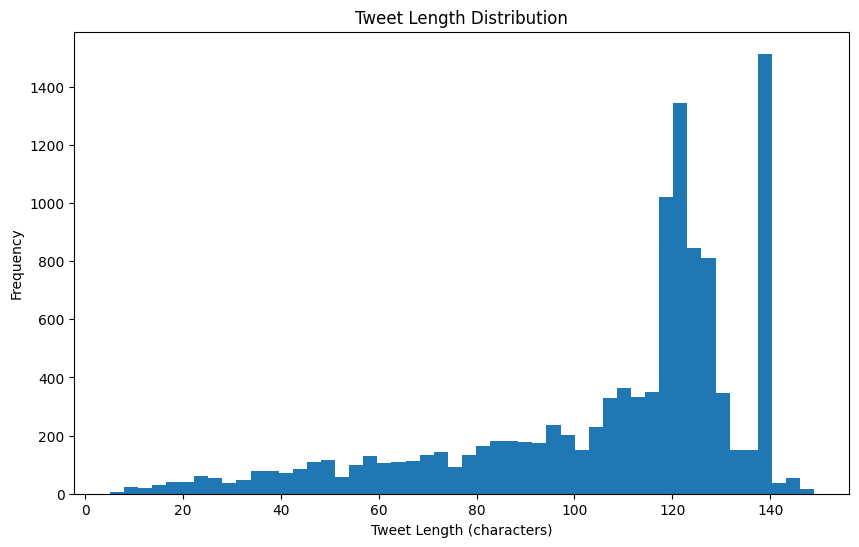

In [ ]:
# Calculate tweet length
Twitter_Data['tweet_length'] = Twitter_Data['text'].apply(len)

# Plot tweet length distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(Twitter_Data['tweet_length'], bins=50)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate longest and shortest tweets
longest_tweet = Twitter_Data.loc[Twitter_Data['tweet_length'].idxmax()]['text']
shortest_tweet = Twitter_Data.loc[Twitter_Data['tweet_length'].idxmin()]['text']
print(f"Longest Tweet: {longest_tweet}")
print(f"Shortest Tweet: {shortest_tweet}")

Longest Tweet: &gt; Get new bicycle saddle &gt; Manual entirely in Chinese &gt; I've got engineering qualifications I'm sure I can figure o… https://t.co/mL94RxUiyx
Shortest Tweet: Hello


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


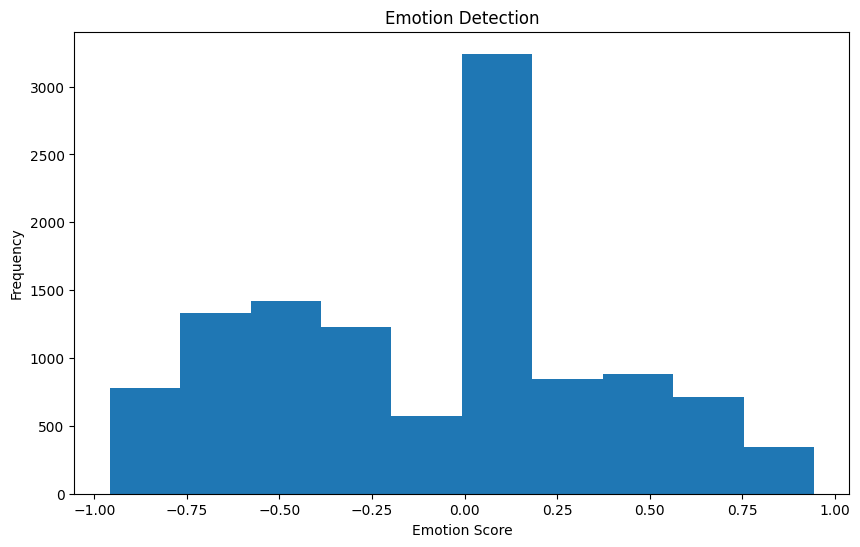

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER sentiment lexicon if not already downloaded
nltk.download('vader_lexicon')
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# Calculate emotion scores
emotions = Twitter_Data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(emotions, bins=10)
plt.title('Emotion Detection')
plt.xlabel('Emotion Score')
plt.ylabel('Frequency')
plt.show()

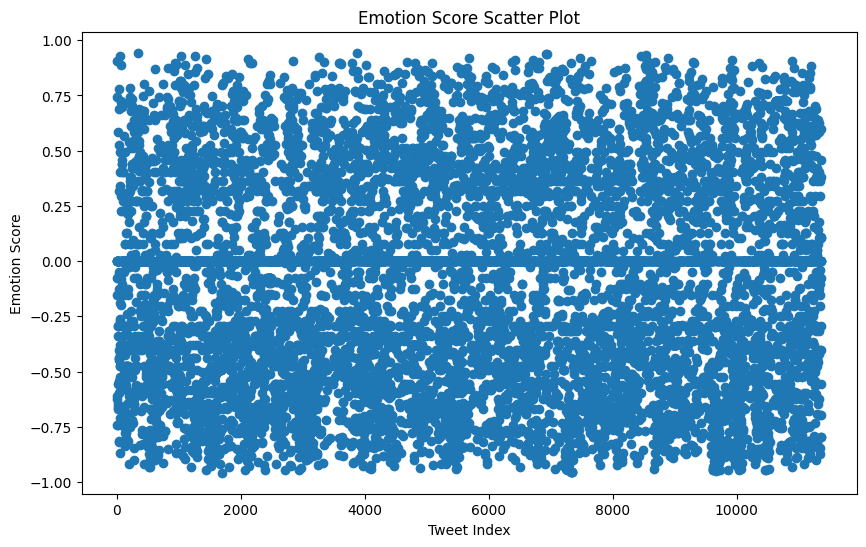

In [ ]:
#Emotion Score Scatter Plot
# Calculate emotion scores
emotions = Twitter_Data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plot scatter plot
plt.figure(figsize=(10,6))
plt.scatter(range(len(emotions)), emotions)
plt.title('Emotion Score Scatter Plot')
plt.xlabel('Tweet Index')
plt.ylabel('Emotion Score')
plt.show()

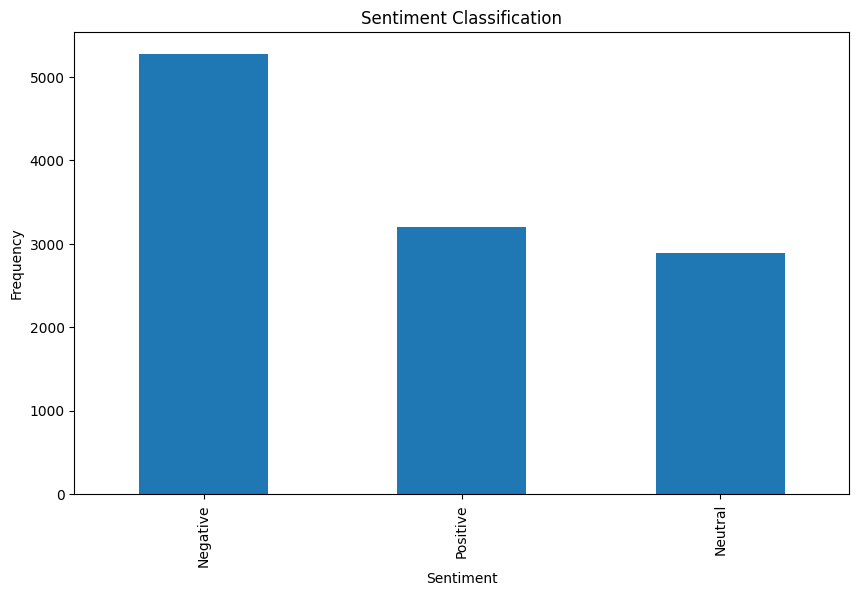

In [ ]:
#----------------------------------------Sentiment Classification Bar Chart----------------------------------
# Calculate sentiment labels (positive, negative, neutral)
sentiments = emotions.apply(lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral')

# Plot bar chart
plt.figure(figsize=(10,6))
sentiments.value_counts().plot(kind='bar')
plt.title('Sentiment Classification')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# **WEEK 2**

**TEXT PREPROCESSING for 'text' column**

**Text Preprocessing Steps:**
1. Remove Special Characters: Eliminate non-alphanumeric characters (e.g., @,#,$).
2. Tokenization: Split text into individual words or tokens.
3. Stopword Removal: Remove common words (e.g., "the", "and", "a").
4. Stemming/Lemmatization: Reduce words to their base form.
5. Remove Whitespaces: Eliminate excess whitespace.
6. Convert to Lowercase: Standardize text case.
7. Remove Short Words: Eliminate words with fewer than 3 characters.
8. Vectorization: Convert text data into numerical representations.

1. (#\w+) - Matches hashtags (e.g., #MachineLearning)
2. (RT\s@\w+:) - Matches retweets (RT) followed by a username (e.g., RT @JohnDoe:)
3. (http.*) - Matches URLs (e.g., (link unavailable))
4. (@\w+) - Matches mentions (e.g., @JohnDoe)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

def clean_text(text):
    text = re.sub(r'https?://[^\s]+', '', text)  # Remove links
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove emojis
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\.{3,}$', '', text)  # Remove trailing ellipsis
    text = text.lower()  # Convert to lowercase
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    text = ' '.join(tokens)
    return text

In [ ]:
#download the stopwords and punkt
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('punkt')
Twitter_Data['text'] = Twitter_Data['text'].apply(clean_text)
print(Twitter_Data['text'].head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     puerto rico hit another 59 magnitude aftershoc...
1     36 aftershock 405 asleep movement bed woke sca...
2     good night friends per usgs new 59 quake morni...
3     yea wasnt long killed like 6 7 seconds sure would
4     honored essay aftershock marking 50th annivers...
5          tickets sale aftershock nowplaying k4hdradio
6                                    come us aftershock
7                              oo think felt aftershock
8     quick comparison ongoing 2020 m64 puerto rico ...
9     puerto ricans refusing go home aside 54 afters...
10    2010 inception social network easy black swan ...
11    puerto rico hit another 59 magnitude aftershoc...
12    puerto rico hit another 59 magnitude aftershoc...
13                                             hard hit
14    musharaf verdict mild aftershock extension one...
15    puerto rico hit another 59 magnitude aftershoc...
16    kumera yellow aftershock ph19fossil featured b...
17    puerto rico hit another 59 magnitude after

**TEXT PREPROCESSING FOR 'location' column**

Appling similar cleaning and normalization steps to the "location" column:
1. Remove special characters and punctuation.
2. Convert to title case (capitalize first letter of each word).
3. Remove unnecessary words (e.g., "city", "state", "country").
4. Standardize location formats (e.g., "New York, NY" instead of "NYC").

In [ ]:
#location needs to be converted into string for this
Twitter_Data['location'] = Twitter_Data['location'].astype(str)
def clean_location(text):
    text = re.sub(r'[^a-zA-Z0-9\s,.-]', '', text)  # Remove special characters
    text = text.title()  # Convert to title case
    text = re.sub(r'\b(city|state|country)\b', '',text, flags=re.IGNORECASE)  # Remove unnecessary words
    text = re.sub(r'\s+', ' ', text)  # Remove excess whitespace
    return text
Twitter_Data['location'] = Twitter_Data['location'].apply(clean_location)

In [ ]:
print(Twitter_Data['location'].head(20))

0                         Global
1               Puerto Rico, Usa
2         In The Mind Of Haters.
3                 Czech Republic
4                            Usa
5                            Nan
6                   Bay Area, Ca
7        Great Southwest, U.S.A.
8               Katowice, Poland
9                            Nan
10                       Toronto
11                         Texas
12                  So Paulo -Sp
13     Philippines ,From America
14                     Islamabad
15            Flatbush, Brooklyn
16           Surabaya, Indonesia
17                           Nan
18                           Nyc
19                        Ethers
Name: location, dtype: object


**I WILL DO EXTRACTION OF LOCATIONS FROM TWEETS BEFORE THE VECTORIZATION AND PUTTING THEM INTO THE NULL VALUES(34I8)**

In [ ]:
# Create a copy of the original dataframe to avoid modifying it
df_filled = Twitter_Data.copy()
# Extract locations from text for null values
df_filled['location'] = df_filled.apply(lambda row: extract_location(row['text']) if pd.isnull(row['location']) else row['location'], axis=1)

Q6. WRITE THE STEPS TO REMOVE THE NULL VALUES IN THE "LOCATION" COLUMN?

In [ ]:
#I will use spacy library cause 1. SpaCy's pre-trained models have excellent performance on entity recognition tasks.
#It can handle various location formats, including cities, countries, and regions.
!pip install spacy
import spacy

In [ ]:
import spacy
import pandas as pd
#Load SpaCy model
nlp = spacy.load('en_core_web_sm')
#Define function to extract location
def extract_location(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'GPE': #Geopolitical Entity
            return ent.text
    return None

In [ ]:
# Apply function to dataset (fill null-NaN values in 'location')
Twitter_Data['location'] =Twitter_Data.apply(lambda row: extract_location(row['text']) if pd.isnull(row['location']) else row['location'], axis=1)

In [ ]:
Twitter_Data.isnull().sum()

,0
keyword,0
location,0
text,0
target,0
sentiment,0


**THERE ARE STILL NAN VALUES PRESENT IN THE FORM OF STRING SO WE WILL TRY TO SOLVE IT**

In [ ]:
print(Twitter_Data['location'].head(20))

0                         Global
1               Puerto Rico, Usa
2         In The Mind Of Haters.
3                 Czech Republic
4                            Usa
5                            Nan
6                   Bay Area, Ca
7        Great Southwest, U.S.A.
8               Katowice, Poland
9                            Nan
10                       Toronto
11                         Texas
12                  So Paulo -Sp
13     Philippines ,From America
14                     Islamabad
15            Flatbush, Brooklyn
16           Surabaya, Indonesia
17                           Nan
18                           Nyc
19                        Ethers
Name: location, dtype: object


In [ ]:
#This discrepancy is resolved after replacing string 'NaN' with actual NaN using:
Twitter_Data = Twitter_Data.replace('Nan', np.nan)

In [ ]:
#Code to fill NaN values:
Twitter_Data['location'] = Twitter_Data.apply(
    lambda row: extract_location(row['text']) if pd.isnull(row['location']) else row['location'],
    axis=1
)

In [ ]:
Twitter_Data.isnull().sum()#spacy filled 710 values

,0
keyword,0
location,2707
text,0
target,0
sentiment,0


In [ ]:
spacy_extracted = Twitter_Data[(Twitter_Data['location'].notnull()) & (Twitter_Data['location'] != '')]
print(spacy_extracted['location'].head(50))

0                             Global
1                   Puerto Rico, Usa
2             In The Mind Of Haters.
3                     Czech Republic
4                                Usa
6                       Bay Area, Ca
7            Great Southwest, U.S.A.
8                   Katowice, Poland
10                           Toronto
11                             Texas
12                      So Paulo -Sp
13         Philippines ,From America
14                         Islamabad
15                Flatbush, Brooklyn
16               Surabaya, Indonesia
18                               Nyc
19                            Ethers
20                                , 
21      Planet Eyal, Shandral System
24                      Brooklyn, Ny
26               Melbourne, Victoria
28                Piscataway Land Dc
29                   Depressed Vibes
33              Bum Fuck, California
34                              apex
37               Wilmington, Nc- Usa
38             Dream Big ,Nyc , Flla
3

**now applying regrex method**

In [ ]:
import re#A regular expression (shortened as regex or regexp)
# Define regex pattern for location extraction

In [ ]:
location_patterns = [
    r'\b(New|North|South|East|West) \w+\b',  # Directional cities
    r'\b\w+ville\b', #Cities ending in "ville"
    r'\b\w+ city\b', #Cities with "city" suffix
    r'\b\w+ state\b', # States
    r'\b(NY|CA|FL|TX|IL|PA|OH|GA|NC|MI)\b',#Common state abbreviations
    r'\b(USA|United States|America)\b',#Country names
]

In [ ]:
def extract_location_regex(text):
    for pattern in location_patterns:
        match = re.search(pattern, text, re.IGNORECASE)#re.IGNORECASE flag for case-insensitive matching.
        if match:
            return match.group()
    return None

In [ ]:
# Apply regex function to dataset (fill null values in 'location')
Twitter_Data['location'] = Twitter_Data.apply(lambda row: extract_location_regex(row['text']) if pd.isnull(row['location']) else row['location'], axis=1)

In [ ]:
Twitter_Data.isnull().sum()

,0
keyword,0
location,2551
text,0
target,0
sentiment,0


In [ ]:
#we will now use more in depth locations for better accuracy
#updated code includes:1. Additional state abbreviations2. County names3. Zip code pattern4. All 50 US state abbreviations
location_patterns = [
    r'\b(New|North|South|East|West) \w+\b',  # Directional cities
    r'\b\w+ville\b', #Cities ending in "ville"
    r'\b\w+ city\b', #Cities with "city" suffix
    r'\b\w+ state\b', # States
    r'\b(NY|CA|FL|TX|IL|PA|OH|GA|NC|MI)\b',#Common state abbreviations
    r'\b(USA|United States|America)\b',#Country names
    r'\b\d{5}(?:-\d{4})?\b', # Zip codes like The zip code for New York is 10021
    r'\b\w+ County\b',  # Counties
    r'\b(AK|AL|AR|AZ|CA|CO|CT|DE|FL|GA|HI|IA|ID|IL|IN|KS|KY|LA|MA|MD|ME|MI|MN|MO|MS|MT|NC|ND|NE|NH|NJ|NM|NV|NY|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VA|VT|WA|WI|WV|WY)\b',# All state abbreviations
    r'\b(India|Bharat)\b',  #Country names
    r'\b\w+ taluk\b',  #Taluks
    r'\b\w+ tehsil\b',  #Tehsils
    r'\b\w+ mandal\b',  #Mandals
    r'\b(Ahmedabad|Bangalore|Chennai|Delhi|Hyderabad|Kolkata|Mumbai|Pune|Surat)\b',#Major cities
    r'\b(JFK|LAX|EWR)\b',  #airport codes
    r'\b(\d{1,2}\.\d{1,2}° (N|S), \d{1,3}\.\d{1,2}° (E|W))\b',  #geographic coordinates
]

In [ ]:
def extract_location_regex(text):
    for pattern in location_patterns:
        match = re.search(pattern, text, re.IGNORECASE)#re.IGNORECASE flag for case-insensitive matching.
        if match:
            return match.group()
    return None

In [ ]:
# Apply regex function to dataset (fill null values in 'location')
Twitter_Data['location'] = Twitter_Data.apply(lambda row: extract_location_regex(row['text']) if pd.isnull(row['location']) else row['location'], axis=1)

In [ ]:
Twitter_Data.isnull().sum()

,0
keyword,0
location,2456
text,0
target,0
sentiment,0


**USING FUZZYWUZZY FOR MORE LOCATION EXTRACTION**

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz
location_patterns = [
    r'\b(New|North|South|East|West) \w+\b',  # Directional cities
    r'\b\w+ville\b', #Cities ending in "ville"
    r'\b\w+ city\b', #Cities with "city" suffix
    r'\b\w+ state\b', # States
    r'\b(NY|CA|FL|TX|IL|PA|OH|GA|NC|MI)\b',#Common state abbreviations
    r'\b(USA|United States|America)\b',#Country names
    r'\b\d{5}(?:-\d{4})?\b', # Zip codes like The zip code for New York is 10021
    r'\b\w+ County\b',  # Counties
    r'\b(AK|AL|AR|AZ|CA|CO|CT|DE|FL|GA|HI|IA|ID|IL|IN|KS|KY|LA|MA|MD|ME|MI|MN|MO|MS|MT|NC|ND|NE|NH|NJ|NM|NV|NY|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VA|VT|WA|WI|WV|WY)\b',# All state abbreviations
    r'\b(India|Bharat)\b',  #Country names
    r'\b\w+ taluk\b',  #Taluks
    r'\b\w+ tehsil\b',  #Tehsils
    r'\b\w+ mandal\b',  #Mandals
    r'\b(Ahmedabad|Bangalore|Chennai|Delhi|Hyderabad|Kolkata|Mumbai|Pune|Surat)\b',#Major cities
    r'\b(JFK|LAX|EWR)\b',  #airport codes
    r'\b(\d{1,2}\.\d{1,2}° (N|S), \d{1,3}\.\d{1,2}° (E|W))\b',  #geographic coordinates
    r'\b\w+town\b',
    r'\b\w+burg\b',
    r'\b\w+village\b',
    r'\b\w+ University\b',
    r'\b\w+ Hospital\b',
    r'\b\w+ International Airport\b',
    r'\bI-\d+\b',
    r'\bUS-\d+\b',
    r'\bRoute \d+\b',
    r'\b\d+\.\d+,-\d+\.\d+\b',
    # Cities and towns
    r'\b\w+ville\b',
    r'\b\w+city\b',
    r'\b\w+town\b',
    r'\b\w+burg\b',
    r'\b\w+village\b',
    r'\b\w+stadt\b',  # German cities
    r'\b\w+shi\b',  # Japanese cities

    # Countries
    r'\b(USA|United States|America|United Kingdom|UK|Canada|Australia|Germany|France|China|Japan|India|Brazil|Russia)\b',
    r'\b(Afghanistan|Albania|Algeria|Andorra|Angola|Antigua|Argentina|Armenia|Australia|Austria|Azerbaijan|Bahamas|Bahrain|Bangladesh|Barbados|Belarus|Belgium|Belize|Benin|Bhutan|Bolivia|Bosnia|Botswana|Brazil|Brunei|Bulgaria|Burkina Faso|Burundi|Cambodia|Cameroon|Canada|Central African Republic|Chad|Chile|China|Colombia|Comoros|Congo|Costa Rica|Croatia|Cuba|Cyprus|Czech Republic|Denmark|Djibouti|Dominica|Dominican Republic|Ecuador|Egypt|El Salvador|Equatorial Guinea|Eritrea|Estonia|Ethiopia|Fiji|Finland|France|Gabon|Gambia|Georgia|Germany|Ghana|Greece|Grenada|Guatemala|Guinea|Guinea-Bissau|Guyana|Haiti|Honduras|Hungary|Iceland|India|Indonesia|Iran|Iraq|Ireland|Israel|Italy|Jamaica|Japan|Jordan|Kazakhstan|Kenya|Kiribati|North Korea|South Korea|Kosovo|Kuwait|Kyrgyzstan|Laos|Latvia|Lebanon|Lesotho|Liberia|Libya|Lithuania|Luxembourg|Macedonia|Madagascar|Malawi|Malaysia|Maldives|Mali|Malta|Marshall Islands|Mauritania|Mauritius|Mexico|Micronesia|Moldova|Monaco|Mongolia|Montenegro|Morocco|Mozambique|Myanmar|Namibia|Nauru|Nepal|Netherlands|New Zealand|Nicaragua|Niger|Nigeria|Norway|Oman|Pakistan|Palau|Panama|Papua New Guinea|Paraguay|Peru|Philippines|Poland|Portugal|Qatar|Romania|Russia|Rwanda|Saint Kitts|Saint Lucia|Saint Vincent|Samoa|San Marino|Sao Tome|Saudi Arabia|Senegal|Serbia|Seychelles|Sierra Leone|Singapore|Slovakia|Slovenia|Solomon Islands|Somalia|South Africa|South Sudan|Spain|Sri Lanka|Sudan|Suriname|Swaziland|Sweden|Switzerland|Syria|Taiwan|Tajikistan|Tanzania|Thailand|Timor-Leste|Togo|Tonga|Trinidad|Tunisia|Turkey|Turkmenistan|Tuvalu|Uganda|Ukraine|United Arab Emirates|United Kingdom|Uruguay|Uzbekistan|Vanuatu|Vatican City|Venezuela|Vietnam|Yemen|Zambia|Zimbabwe)\b',

    # States and provinces
    r'\b\w+ state\b',
    r'\b\w+ province\b',
    r'\b\w+ region\b',
    r'\b\w+ territory\b',
    r'\b\w+ county\b',
    r'\b\w+ municipality\b',
    r'\b\w+ department\b',  # French departments

    # Zip codes and postal codes
    r'\b\d{5}(?:-\d{4})?\b',  # US zip codes
    r'\b[A-Z]{1,2}\d[A-Z\d]? \d[ABD-HJLNP-UW-Z]{2}\b',  # UK postal codes
    r'\b\d{5} \d{5}\b',  # Canadian postal codes

    # Geographic coordinates
    r'\b\d+\.\d+,-\d+\.\d+\b',
    r'\b\d+\.\d+, \d+\.\d+\b',
    r'\b\d+\°\d+\'\d+"(N|S), \d+\°\d',

    # Airport codes
r'\b(JFK|LAX|EWR|ORD|DFW|SFO|MIA|LAS|PHX|IAH|ATL|CLT|MCO|FLL|DAL|BOS|DEN|SEA|DTW|MSP|STL|CLE|CMH|PIT|IND|AUS|SJC|OAK|SNA|SAN|PDX|SLC|MKE|MSY|BWI|BNA|RSW|TPA|ABQ|SMF|SAC|BOI|GEG|OKC|OMA|MCI|KCI|MHT|PVD|PWM|ALB|SYR|ROC|DAY|CVG|CMH|GSO|RDU|CLT|CHA|TRI|MGY|CAE|GSP|AVL|HSV|TUL|XNA|FSM|JAX|OAJ|ECP|VPS|PNS|MLB|SRQ|PIE|PGD|FMY|RSW)\b',

# Major cities worldwide
r'\b(New York|Los Angeles|Chicago|Houston|Phoenix|Philadelphia|San Antonio|San Diego|Dallas|San Jose|Austin|Jacksonville|San Francisco|Indianapolis|Columbus|Fort Worth|Charlotte|Memphis|Boston|Baltimore|Detroit|El Paso|Milwaukee|Seattle|Denver|Washington|Nashville|Kansas City|Oklahoma City|Portland|Las Vegas|Louisville|Albuquerque|Tucson|Long Beach|Colorado Springs|Hartford|Tampa|Orlando|Miami|Oakland|Minneapolis|Tulsa|Virginia Beach|Atlanta|Sacramento|New Orleans|Cleveland|Kansas|St. Louis|Cincinnati|Pittsburgh|Greenville|Providence|Albany|Syracuse|Rochester|Dayton|Covington|Columbus|Greensboro|Raleigh|Charlotte|Chattanooga|Tri Cities|Montgomery|Columbia|Greenville|Spartanburg|Asheville|Huntsville|Tulsa|Jacksonville|Tallahassee|Gainesville|Pensacola|Fort Myers|Sarasota|Bradenton|Lakeland|Winter Haven|Chicago|London|Paris|Tokyo|Beijing|Moscow|Istanbul|Mumbai|Sao Paulo|Shanghai|Osaka|Cairo|Dhaka|Buenos Aires|Kolkata|Lagos|Karachi|Chongqing|Dalian|Shenzhen|Istanbul|Bangkok|Tehran|Bogota|Lima|Ho Chi Minh City)\b',

# Mountains and rivers
r'\b(Mount Everest|Mount Kilimanjaro|Mount Fuji|Mount St. Helens|Mount Olympus|Rocky Mountains|Himalayas|Andes|Amazon River|Nile River|Mississippi River|Colorado River|Rio Grande|Yellow River|Yangtze River|Amazon River|Congo River|Mekong River|Ganges River|Euphrates River|Tigris River|Rhine River|Danube River|Niger River|Amur River|Yenisei River|Ob River|Parana River|Orange River|Caspian Sea|Black Sea|Mediterranean Sea|Red Sea|Caribbean Sea|Gulf of Mexico|Persian Gulf|Arabian Sea|Bay of Bengal|South China Sea|East China Sea|Sea of Japan|Yellow Sea|Okhotsk Sea|Bering Sea|Arctic Ocean|Atlantic Ocean|Indian Ocean|Pacific Ocean)\b'
]

def extract_location(text):
    for pattern in location_patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            return match.group()
    return None

## Apply function to dataset (only for null values)
Twitter_Data.loc[Twitter_Data['location'].isnull(), 'location'] = Twitter_Data.loc[Twitter_Data['location'].isnull(), 'text'].apply(extract_location)

In [ ]:
Twitter_Data.isnull().sum()

,0
keyword,0
location,2287
text,0
target,0
sentiment,0


In [ ]:
#Use re.findall for multiple matches:
def extract_location_regex(text):
    matches = []
    for pattern in location_patterns:
        matches.extend(re.findall(pattern, text, re.IGNORECASE))
    return matches if matches else None

In [ ]:
# Apply regex function to dataset (fill null values in 'location')
Twitter_Data['location'] = Twitter_Data.apply(lambda row: extract_location_regex(row['text']) if pd.isnull(row['location']) else row['location'], axis=1)

In [ ]:
Twitter_Data.isnull().sum()
#it specifies we did not had any multiple locations

,0
keyword,0
location,2287
text,0
target,0
sentiment,0


In [ ]:
# Get unique values and counts
location_counts = Twitter_Data['location'].value_counts()

# Print unique values and counts
print(location_counts)

location
United States            95
                         92
Usa                      78
Australia                74
New York                 71
                         ..
Jp                        1
T 3.099457,101.681025     1
Makati                    1
Tdgbhl                    1
Weener                    1
Name: count, Length: 4235, dtype: int64


In [ ]:
import spacy
import pandas as pd

# Load pre-trained NLP model
nlp = spacy.load("en_core_web_sm")

#Define function to check location with error handling
def check_location(x):
    try:
        return any(ent.label_ == "GPE" and "India" in ent.text for ent in nlp(x).ents)
    except:
        return False

#Apply NLP model to filter India-related locations
india_data = Twitter_Data[Twitter_Data['location'].apply(check_location)]
#Get unique locations and counts for India
india_location_counts = india_data['location'].value_counts()
#Print unique locations and counts
print(india_location_counts)

location
India                        52
Mumbai, India                36
Bengaluru, India             33
Kolkata, India               23
New Delhi, India             20
                             ..
Andhra Pradesh,India          1
At-Large In India             1
Greater Noida West, India     1
Bangalore, India              1
Nadiad ,Gujarat , India       1
Name: count, Length: 75, dtype: int64


In [ ]:
print(india_location_counts.nlargest(10))

location
India                52
Mumbai, India        36
Bengaluru, India     33
Kolkata, India       23
New Delhi, India     20
Hyderabad, India     12
Kerala, India         4
Rajasthan, India      3
Ranchi, India         3
Chandigarh, India     3
Name: count, dtype: int64


In [ ]:
#filling the missing values with 'unknown'
Twitter_Data['location'].fillna('unknown', inplace=True)

In [ ]:
#step3. confirm if it is really changed
Twitter_Data.isnull().sum()

,0
keyword,0
location,0
text,0
target,0
sentiment,0


In [ ]:
#----------------------------------AGAIN CLEANING-------------------------------------
import numpy as np

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

def clean_location(text):
    # Remove non-English characters
    text = re.sub(r'[^\x00-\x7F]+', '', str(text))
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
    # Remove extra whitespace
    text = re.sub(' +', ' ', text)
    return text.strip()  # Remove leading/trailing whitespace
# Apply cleaning function to 'location' column
Twitter_Data['location'] = Twitter_Data['location'].apply(clean_location)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Export cleaned locations to a new CSV file
Twitter_Data[['location']].to_csv('cleaned_locations.csv', index=False)

In [ ]:
#Re-fill blank values after cleaning
# Clean locations
Twitter_Data['location'] = Twitter_Data['location'].apply(clean_location)

# Re-fill blank values with mode
Twitter_Data['location'].fillna(str(Twitter_Data['location'].mode().values[0]), inplace=True)

In [ ]:
print(Twitter_Data['location'].isnull().sum())

0


In [ ]:
print((Twitter_Data['location'] == '').sum())

170


In [ ]:
#Verify whitespace strings
print((Twitter_Data['location'].str.strip() == '').sum())

170


In [ ]:
Twitter_Data['location'] = Twitter_Data['location'].apply(lambda x: x.strip() if isinstance(x, str) else x)
Twitter_Data['location'] = Twitter_Data['location'].replace('', np.nan)
mode_value = Twitter_Data['location'].mode().values[0]
Twitter_Data['location'] = Twitter_Data['location'].fillna(mode_value)

In [ ]:
print(Twitter_Data['location'].isnull().sum())
print((Twitter_Data['location'] == '').sum())
print((Twitter_Data['location'].str.strip() == '').sum())
print(Twitter_Data['location'].notnull().sum())

0
0
0
11543


In [ ]:
#To combine "India" and "india" into a single "India"
Twitter_Data['location'] = Twitter_Data['location'].apply(lambda x: x.title())
Twitter_Data['location'] = Twitter_Data['location'].replace(['Sheher'], 'India')
#"US" and "USA" typically refer to the same country, the United States of America.To combine them into a single entity:
Twitter_Data['location'] = Twitter_Data['location'].replace(['Us', 'USA','Usa'], 'United States')
#combine "UK" and "United Kingdom"
Twitter_Data['location'] = Twitter_Data['location'].replace([
    'UK',
    'U.K.',
    'Uk',
    'united kingdom'
], 'United Kingdom')
#combine all the variations of new york
Twitter_Data['location'] = Twitter_Data['location'].replace([
    'New York NY',
    'New York',
    'New York USA',
    'New York Usa',
    'Nyc',
    'NY',
    'NewYork',
    'New York Ny',
    'new york'
], 'New York')
Twitter_Data['location'] = Twitter_Data['location'].replace([
    'London',
    'London England',
    'London, England',
    'London UK',
    'London Uk',
], 'London, England')


In [ ]:
# Define a function to replace invalid locations
def replace_invalid_locations(location):
    invalid_locations = [
        'Earth',
        'Planet Earth',
        'Moes Tavern Springfield',
        'Worldwide',
        'hi','Hi',
        'oh','Oh',
        'Id',
        'id',
        'Hell',
        'Everywhere','Global',
    ]
    if location in invalid_locations:
        return 'Australia'
    else:
        return location

In [ ]:
#Apply function to 'location' column
Twitter_Data['location'] = Twitter_Data['location'].apply(replace_invalid_locations)
#Verify changes
print(Twitter_Data['location'].value_counts().head(60))

location
None                         2458
Australia                     298
United States                 202
London, England               168
New York                      126
United Kingdom                123
India                          92
Iran                           64
China                          49
Republic Philippines           49
Texas                          45
Philippines                    45
Pakistan                       44
Washington Dc                  44
Nairobi Kenya                  43
England                        42
Indonesia                      41
California                     40
Malaysia                       40
Dublin Ireland                 40
Thailand                       40
Kenya                          40
Portland                       39
Ghana                          39
Los Angeles Ca                 39
California Usa                 38
Singapore                      38
Israel                         38
Mumbai India                   37
Day  

**HANDLING KEYWORD COLUMN**

In [ ]:
Twitter_Data.isnull().sum()

,0
keyword,0
location,0
text,0
target,0
sentiment,0


In [ ]:
print(Twitter_Data['keyword'].value_counts().head(60))

keyword
Fire                                                                                          413
Infrastructure Collapse                                                                       387
Transportation Accident                                                                       293
Severe Weather                                                                                270
Flooding                                                                                      215
Catastrophic Event                                                                            192
Fatalities                                                                                    187
Property Damage                                                                               145
Drowning                                                                                      135
Life-Threatening Situation                                                                    125
Severe Weath

In [ ]:
Twitter_Data['keyword'].unique()

array(['aftershock', 'ambulance', 'apocalypse', 'armageddon', 'arson',
       'arsonist', 'attack', 'attacked', 'blaze', 'blazing', 'bleeding',
       'bridge%20collapse', 'buildings%20burning',
       'buildings%20on%20fire', 'burned', 'burning', 'bush%20fires',
       'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed', 'derailment', 'desolate', 'desolation',
       'destroy', 'destroyed', 'destruction', 'detonate', 'devastated',
       'devastation', 'disaster', 'displaced', 'drought', 'drown',
       'drowned', 'drowning', 'dust%20storm', 'earthquake', 'electrocute',
       'electrocuted', 'emergency', 'emergency%20plan',
       'emergency%20services', 'engulfed', 'epicent

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
import re

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Existing disaster keywords
existing_disaster_keywords = ['aftershock', 'ambulance', 'apocalypse', 'armageddon', 'arson',
       'arsonist', 'attack', 'attacked', 'blaze', 'blazing', 'bleeding',
       'bridge%20collapse', 'buildings%20burning',
       'buildings%20on%20fire', 'burned', 'burning', 'bush%20fires',
       'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed', 'derailment', 'desolate', 'desolation',
       'destroy', 'destroyed', 'destruction', 'detonate', 'devastated',
       'devastation', 'disaster', 'displaced', 'drought', 'drown',
       'drowned', 'drowning', 'dust%20storm', 'earthquake', 'electrocute',
       'electrocuted', 'emergency', 'emergency%20plan',
       'emergency%20services', 'engulfed', 'epicentre', 'evacuate',
       'evacuated', 'evacuation', 'explode', 'exploded', 'explosion',
       'eyewitness', 'famine', 'fatal', 'fatalities', 'fatality', 'fear',
       'fire', 'fire%20truck', 'first%20responders', 'flames',
       'flattened', 'flood', 'flooding', 'floods', 'forest%20fire',
       'forest%20fires', 'hail', 'hailstorm', 'harm', 'hazard',
       'hazardous', 'heat%20wave', 'hellfire', 'hostage', 'hostages',
       'hurricane', 'injured', 'injuries', 'injury', 'inundated',
       'inundation', 'landslide', 'lava', 'lightning', 'loud%20bang',
       'mass%20murder', 'mass%20murderer', 'massacre', 'mayhem',
       'meltdown', 'military', 'mudslide', 'natural%20disaster',
       'nuclear%20disaster', 'nuclear%20reactor', 'obliterate',
       'obliterated', 'obliteration', 'oil%20spill', 'outbreak',
       'pandemonium', 'panic', 'panicking', 'police', 'quarantine',
       'quarantined', 'radiation%20emergency', 'rainstorm', 'razed',
       'refugees', 'rescue', 'rescued', 'rescuers', 'riot', 'rioting',
       'rubble', 'ruin', 'sandstorm', 'screams', 'seismic', 'sinkhole',
       'sinking', 'siren', 'smoke', 'snowstorm', 'storm', 'stretcher',
       'structural%20failure', 'sunk', 'survive', 'survived', 'survivors',
       'threat', 'thunder', 'thunderstorm', 'tornado', 'tragedy',
       'trapped', 'trauma', 'traumatised', 'trouble', 'tsunami',
       'twister', 'typhoon', 'upheaval', 'violent%20storm', 'volcano',
       'war%20zone', 'weapon', 'weapons', 'whirlwind', 'wild%20fires',
       'wildfire', 'windstorm', 'wounded', 'wounds',
       'burning%20buildings']

# Dictionary to map existing keywords to descriptive names
keyword_map = {
    'ablaze': 'Building Fire',
    'accident': 'Transportation Accident',
    'aftershock': 'Earthquake Aftershock',
    'airplane%20accident': 'Aviation Accident',
    'ambulance': 'Medical Emergency',
    'annihilated': 'Mass Destruction',
    'annihilation': 'Mass Destruction',
    'apocalypse': 'Catastrophic Event',
    'armageddon': 'Catastrophic Event',
    'army': 'Military Involvement',
    'arson': 'Intentional Fire',
    'arsonist': 'Intentional Fire',
    'attack': 'Violent Assault',
    'attacked': 'Violent Assault',
    'avalanche': 'Snowslide',
    'battle': 'War/Military Conflict',
    'bioterror': 'Biological Terrorism',
    'bioterrorism': 'Biological Terrorism',
    'blaze': 'Fire',
    'blazing': 'Fire',
    'bleeding': 'Medical Emergency',
    'blew%20up': 'Explosion',
    'blight': 'Disease Outbreak',
    'blizzard': 'Severe Weather',
    'blood': 'Violence',
    'bloody': 'Violence',
    'blown%20up': 'Explosion',
    'body%20bag': 'Fatalities',
    'body%20bagging': 'Fatalities',
    'body%20bags': 'Fatalities',
    'bomb': 'Explosion',
    'bombed': 'Explosion',
    'bombing': 'Explosion',
    'bridge%20collapse': 'Infrastructure Collapse',
    'buildings%20burning': 'Fire',
    'buildings%20on%20fire': 'Fire',
    'burned': 'Fire',
    'burning': 'Fire',
    'bush%20fires': 'Wildfire',
    'casualties': 'Fatalities',
    'casualty': 'Fatalities',
    'catastrophe': 'Catastrophic Event',
    'catastrophic': 'Catastrophic Event',
    'chemical%20emergency': 'Hazardous Materials',
    'cliff%20fall': 'Rockslide',
    'collapse': 'Infrastructure Collapse',
    'collapsed': 'Infrastructure Collapse',
    'collide': 'Transportation Accident',
    'collided': 'Transportation Accident',
    'collision': 'Transportation Accident',
    'crash': 'Transportation Accident',
    'crashed': 'Transportation Accident',
    'crush': 'Infrastructure Collapse',
    'crushed': 'Infrastructure Collapse',
    'curfew': 'Civil Unrest',
    'cyclone': 'Severe Weather',
    'damage': 'Property Damage',
    'danger': 'Life-Threatening Situation',
    'dead': 'Fatalities',
    'death': 'Fatalities',
    'deaths': 'Fatalities',
    'debris': 'Property Damage',
    'deluge': 'Flooding',
    'deluged': 'Flooding',
    'demolish': 'Infrastructure Collapse',
    'demolished': 'Infrastructure Collapse',
    'demolition': 'Infrastructure Collapse',
    'derail': 'Transportation Accident',
    'derailed': 'Transportation Accident',
    'derailment': 'Transportation Accident',
    'desolate': 'Environmental Disaster',
    'desolation': 'Environmental Disaster',
    'destroy': 'Property Damage',
    'destroyed': 'Property Damage',
    'destruction': 'Property Damage',
    'detonate': 'Explosion',
    'devastated': 'Catastrophic Event',
    'devastation': 'Catastrophic Event',
    'disaster': 'Catastrophic Event',
    'displaced': 'Refugee Crisis',
    'drought': 'Environmental Disaster',
    'drown': 'Drowning',
    'drowned': 'Drowning',
    'drowning': 'Drowning',
    'dust%20storm': 'Severe Weather',
    'earthquake': 'Earthquake',
    'electrocute': 'Electrocution',
    'electrocuted': 'Electrocution',
    'emergency': 'Life-Threatening Situation',
    'emergency%20plan': 'Emergency Response',
    'emergency%20services': 'Emergency Response',
    'engulfed': 'Fire',
    'epicentre': 'Earthquake',
    'evacuate': 'Evacuation',
    'evacuated': 'Evacuation',
    'evacuation': 'Evacuation',
    'explode': 'Explosion',
    'exploded': 'Explosion',
    'explosion': 'Explosion',
    'eyewitness': 'Witness Account',
'famine': 'Food Shortage',
'fatal': 'Fatalities',
'fatalities': 'Fatalities',
'fatality': 'Fatalities',
'fear': 'Anxiety/Panic',
'fire': 'Fire',
'fire%20truck': 'Fire Response',
'first%20responders': 'Emergency Response',
'flames': 'Fire',
'flattened': 'Infrastructure Collapse',
'flood': 'Flooding',
'flooding': 'Flooding',
'floods': 'Flooding',
'forest%20fire': 'Wildfire',
'forest%20fires': 'Wildfire',
'hail': 'Severe Weather',
'hailstorm': 'Severe Weather',
'harm': 'Physical Harm',
'hazard': 'Hazards',
'hazardous': 'Hazards',
'heat%20wave': 'Severe Weather',
'hellfire': 'Fire',
'hijack': 'Terrorism',
'hijacker': 'Terrorism',
'hijacking': 'Terrorism',
'hostage': 'Hostage Situation',
'hostages': 'Hostage Situation',
'hurricane': 'Severe Weather',
'injured': 'Injuries',
'injuries': 'Injuries',
'injury': 'Injuries',
'inundated': 'Flooding',
'inundation': 'Flooding',
'landslide': 'Landslide',
'lava': 'Volcanic Eruption',
'lightning': 'Severe Weather',
'loud%20bang': 'Explosion',
'mass%20murder': 'Mass Violence',
'mass%20murderer': 'Mass Violence',
'massacre': 'Mass Violence',
'mayhem': 'Civil Unrest',
'meltdown': 'Nuclear Disaster',
'military': 'Military Involvement',
'mudslide': 'Landslide',
'natural%20disaster': 'Natural Disaster',
'nuclear%20disaster': 'Nuclear Disaster',
'nuclear%20reactor': 'Nuclear Disaster',
'obliterate': 'Mass Destruction',
'obliterated': 'Mass Destruction',
'obliteration': 'Mass Destruction',
'oil%20spill': 'Environmental Disaster',
'outbreak': 'Disease Outbreak',
'pandemonium': 'Civil Unrest',
'panic': 'Anxiety/Panic',
'panicking': 'Anxiety/Panic',
'police': 'Law Enforcement',
'quarantine': 'Disease Outbreak',
'quarantined': 'Disease Outbreak',
'radiation%20emergency': 'Nuclear Disaster',
'rainstorm': 'Severe Weather',
'razed': 'Infrastructure Collapse',
'refugees': 'Refugee Crisis',
'rescue': 'Rescue Efforts',
'rescued': 'Rescue Efforts',
'rescuers': 'Rescue Efforts',
'riot': 'Civil Unrest',
'rioting': 'Civil Unrest',
'rubble': 'Infrastructure Collapse',
'ruin': 'Infrastructure Collapse',
'sandstorm': 'Severe Weather',
'screamed': 'Panic',
'screaming': 'Panic',
'screams': 'Panic',
'seismic': 'Earthquake',
'sinkhole': 'Infrastructure Collapse',
'sinking': 'Infrastructure Collapse',
'siren': 'Emergency Alert',
'sirens': 'Emergency Alert',
'smoke': 'Fire',
'snowstorm': 'Severe Weather',
'storm': 'Severe Weather',
'stretcher': 'Medical Emergency',
'structural%20failure': 'Infrastructure Collapse',
'suicide%20bomb': 'Terrorism',
'suicide%20bomber': 'Terrorism',
'terrorism': 'Terrorism',
'terrorist': 'Terrorism',
'tornado': 'Severe Weather',
'toxic': 'Hazardous Materials',
'tsunami': 'Natural Disaster',
'volcano': 'Volcanic Eruption',
'wildfire': 'Wildfire',
'wreckage': 'Infrastructure Collapse'
}
# Function to extract disaster keywords from text
def extract_disasters(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t.lower() not in stop_words]

    # Use spaCy for entity recognition
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]

    # Extract disaster keywords
    disasters = []
    for token in tokens:
        if token.lower() in existing_disaster_keywords:
            disasters.append(token)

    return disasters

# Function to update keywords
def update_keywords(row):
    extracted_disasters = extract_disasters(row['text'])
    if extracted_disasters:
        # Update keyword with more specific disaster
        keyword = ', '.join([keyword_map.get(d, d) for d in extracted_disasters])
        return keyword
    else:
        # Return original keyword
        return row['keyword']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Update keywords
Twitter_Data['keyword'] = Twitter_Data.apply(update_keywords, axis=1)

In [ ]:
Twitter_Data['keyword'].unique()

array(['Earthquake Aftershock', 'aftershock', 'Earthquake',
       'Earthquake, Earthquake Aftershock', 'Earthquake, Earthquake',
       'Earthquake Aftershock, Property Damage',
       'Fire, Medical Emergency', 'ambulance', 'Medical Emergency',
       'Emergency Alert, Medical Emergency',
       'Medical Emergency, Violent Assault',
       'Medical Emergency, Property Damage', 'Severe Weather', 'Fire',
       'Catastrophic Event', 'apocalypse', 'survived, Catastrophic Event',
       'armageddon', 'arson', 'Intentional Fire',
       'Intentional Fire, Fire', 'Intentional Fire, Intentional Fire',
       'Fatalities, Intentional Fire, Severe Weather',
       'Fire, Intentional Fire', 'Law Enforcement, Intentional Fire',
       'Life-Threatening Situation, Law Enforcement',
       'Severe Weather, Intentional Fire',
       'Intentional Fire, Intentional Fire, Intentional Fire, Intentional Fire, Intentional Fire',
       'arsonist', 'Fatalities', 'Fire, Fire, Anxiety/Panic',
       'Inten

In [ ]:
Twitter_Data['keyword'].value_counts().head(60)

,count
keyword,
Fire,413
Infrastructure Collapse,387
Transportation Accident,293
Severe Weather,270
Flooding,215
Catastrophic Event,192
Fatalities,187
Property Damage,145
Drowning,135


# **WEEK 3**

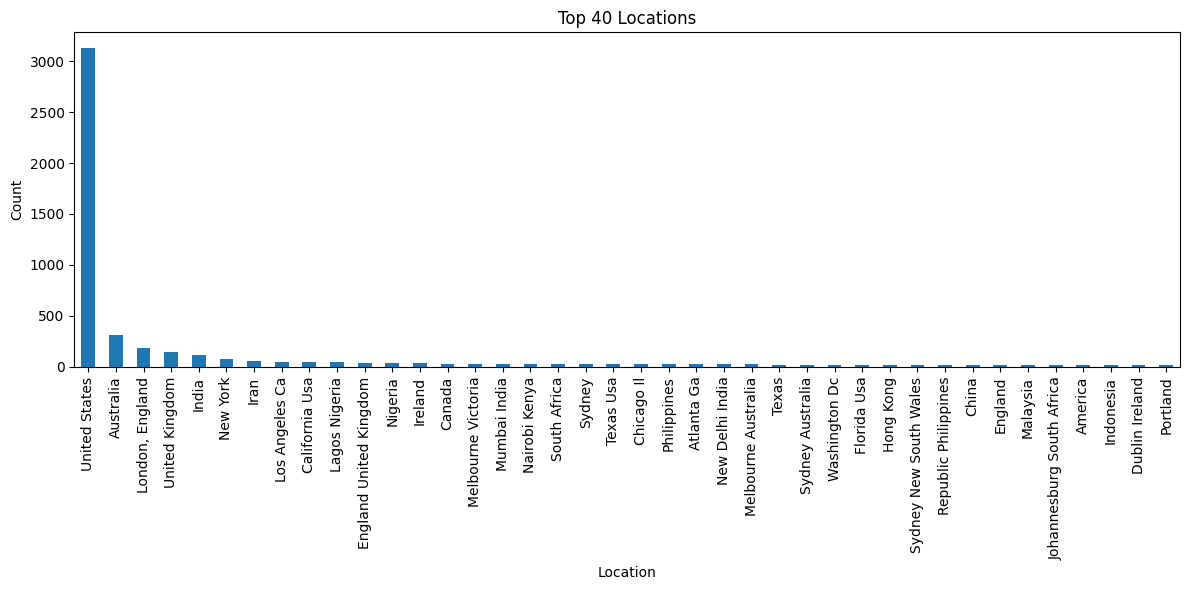

In [ ]:
import matplotlib.pyplot as plt
top_40_locations = Twitter_Data['location'].value_counts().head(40)
plt.figure(figsize=(12, 6))
top_40_locations.plot(kind='bar')
plt.title('Top 40 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
top_40_locations = Twitter_Data['location'].value_counts().head(40).reset_index()
top_40_locations.columns = ['Location', 'Count']

fig = px.bar(top_40_locations, x='Location', y='Count', title='Top 40 Locations')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
import geopy
from geopy.geocoders import Nominatim
import plotly.express as px
import pandas as pd

# Initialize Nominatim API
geolocator = Nominatim(user_agent="twitter_map")

# Function to get latitude and longitude
def get_coordinates(location):
    try:
        return geolocator.geocode(location).point[0:2]
    except:
        return [None, None]

# Get top 40 locations
top_40_locations = Twitter_Data['location'].value_counts().head(40).reset_index()
top_40_locations.columns = ['Location', 'Count']

# Add latitude and longitude columns
top_40_locations['Latitude'] = top_40_locations['Location'].apply(lambda x: get_coordinates(x)[0])
top_40_locations['Longitude'] = top_40_locations['Location'].apply(lambda x: get_coordinates(x)[1])

# Map
fig = px.scatter_geo(
    top_40_locations,
    lat='Latitude',
    lon='Longitude',
    hover_name='Location',
    size='Count',
    color='Count',  # Color by count
    projection='natural earth',
    title='Top 40 Locations',
    width=800,
    height=600,
    color_continuous_scale=px.colors.sequential.Jet  # Color scale
)

fig.update_layout(
    mapbox_style='open-street-map',
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [ ]:
import geopy
from geopy.geocoders import Nominatim
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Initialize Nominatim API
geolocator = Nominatim(user_agent="twitter_map")

# Function to get latitude and longitude
def get_coordinates(location):
    try:
        return geolocator.geocode(location).point[0:2]
    except:
        return [None, None]

# Get top 40 locations
top_40_locations = Twitter_Data['location'].value_counts().head(40).reset_index()
top_40_locations.columns = ['Location', 'Count']

# Add latitude and longitude columns
top_40_locations['Latitude'] = top_40_locations['Location'].apply(lambda x: get_coordinates(x)[0])
top_40_locations['Longitude'] = top_40_locations['Location'].apply(lambda x: get_coordinates(x)[1])

# Normalize 'Count' column
top_40_locations['Normalized Count'] = (top_40_locations['Count'] - top_40_locations['Count'].min()) / (top_40_locations['Count'].max() - top_40_locations['Count'].min())

# Map
fig = go.Figure(
    data=go.Scattergeo(
        lon=top_40_locations['Longitude'],
        lat=top_40_locations['Latitude'],
        text=top_40_locations['Location'],
        mode='markers',
        marker=dict(
            size=top_40_locations['Count'] / 10,
            color=np.linspace(0, 1, len(top_40_locations)),  # Full color gradient
            colorscale='Turbo',  # Color scale with orange and intermediate colors
            showscale=True,
            colorbar=dict(title='Count')
        )
    )
)

fig.update_layout(
    geo=dict(
        scope='world',
        projection_type='natural earth',
        projection_rotation_lon=0,
        showland=True,
        landcolor='rgb(217, 217, 217)',
        countrycolor='rgb(255, 255, 255)'
    ),
    title_text='Top 40 Locations',
    width=800,
    height=600,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [ ]:
unique_locations_count = len(Twitter_Data['location'].unique())
print("Unique Locations Count:", unique_locations_count)

Unique Locations Count: 4186


In [ ]:
import geopy
from geopy.geocoders import Nominatim
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from tqdm import tqdm

# Initialize Nominatim API
geolocator = Nominatim(user_agent="twitter_map", timeout=10)

# Function to get latitude and longitude
def get_coordinates(location):
    try:
        result = geolocator.geocode(location)
        if result is None:
            return [None, None]
        return result.point[0:2]
    except (GeocoderTimedOut, GeocoderServiceError):
        time.sleep(1)
        return get_coordinates(location)

# Get top 1000 unique locations
top_1000_locations = Twitter_Data['location'].value_counts().head(1000).reset_index()
top_1000_locations.columns = ['Location', 'Count']

# Add latitude and longitude columns
for index, row in tqdm(top_1000_locations.iterrows(), total=len(top_1000_locations)):
    coordinates = get_coordinates(row['Location'])
    top_1000_locations.at[index, 'Latitude'] = coordinates[0]
    top_1000_locations.at[index, 'Longitude'] = coordinates[1]
    time.sleep(0.5)  # Rate limiting

# Remove rows with missing coordinates
top_1000_locations = top_1000_locations.dropna(subset=['Latitude', 'Longitude'])

# Log scaling
top_1000_locations['Normalized Count'] = np.log(top_1000_locations['Count']) / np.log(top_1000_locations['Count'].max())

# Map
fig = go.Figure(
    data=go.Scattergeo(
        lon=top_1000_locations['Longitude'],
        lat=top_1000_locations['Latitude'],
        text=top_1000_locations.apply(lambda row: f"Location: {row['Location']}\nCount: {row['Count']}", axis=1),
        mode='markers',
        marker=dict(
            size=top_1000_locations['Count'] / 100,
            color=top_1000_locations['Normalized Count'],
            colorscale='Turbo',
            showscale=True,
            colorbar=dict(title='Normalized Count')
        )
    )
)

fig.update_layout(
    geo=dict(
        scope='world',
        projection_type='natural earth',
        projection_rotation_lon=0,
        showland=True,
        landcolor='rgb(217, 217, 217)',
        countrycolor='rgb(255, 255, 255)'
    ),
    title_text='Top 1000 Unique Locations',
    width=800,
    height=600,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


100%|██████████| 1000/1000 [12:17<00:00,  1.36it/s]


In [ ]:
#Using Plotly's Chloropleth Map
!pip install pycountry
import plotly.graph_objects as go

# Get top 1000 unique locations
top_1000_locations = Twitter_Data['location'].value_counts().head(1000).reset_index()
top_1000_locations.columns = ['Location', 'Count']

# Create a dictionary mapping locations to ISO codes (for country outlines)
import pycountry
location_iso = {}
for index, row in top_1000_locations.iterrows():
    try:
        country = pycountry.countries.get(name=row['Location'])
        location_iso[row['Location']] = country.alpha_3
    except:
        pass

# Map locations to ISO codes
top_1000_locations['ISO'] = top_1000_locations['Location'].apply(lambda x: location_iso.get(x))

# Remove rows with missing ISO codes
top_1000_locations = top_1000_locations.dropna(subset=['ISO'])

# Create the map
fig = go.Figure(
    data=go.Choropleth(
        locations=top_1000_locations['ISO'],
        z=top_1000_locations['Count'],
        text=top_1000_locations['Location'],
        colorscale='Turbo',
        autocolorscale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
    )
)

fig.update_layout(
    title_text='Top 1000 Unique Locations',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)',
        countrycolor='rgb(255, 255, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(0, 0, 0)',
        showframe=False,
    ),
    width=800,
    height=600,
)

fig.show()

# **FOR INDIA**

In [ ]:
print(Twitter_Data['location'].str.contains('India|India|New Delhi|Mumbai|Bangalore|Hyderabad|Ahmedabad|Chennai|Kolkata|Surat|Pune', case=False).sum())

362


In [ ]:
india_locations = Twitter_Data[Twitter_Data['location'].str.contains('India|New Delhi|Mumbai|Bangalore|Hyderabad|Ahmedabad|Chennai|Kolkata|Surat|Pune', case=False)]

In [ ]:
unique_locations = india_locations['location'].unique().tolist()
unique_locations

['Bangalore',
 'Odishabangalore',
 'New Delhi India',
 'Bengaluru India',
 'Hyderabad India',
 'Kolkata India',
 'Mumbai India',
 'Pune India',
 'Chennai',
 'Ballia India',
 'Mumbai',
 'India',
 'Dwarka New Delhi',
 'Bangalore Karnataka India',
 'Delhi India',
 'Assam India',
 'Faridabad India',
 'Gujarat India',
 'Chennai India',
 'New Delhi',
 'Jehanabad India',
 'Lucknow India',
 'Mysore India',
 'Panjim Goa India',
 'Tumakuru India',
 'New Delhi Delhi',
 'Pleasantonchennai',
 'Bhubaneshwar India',
 'Indianapolis',
 'Arrah India',
 'Kerala India',
 'Bhubaneshwar Odisha India',
 'Patna India',
 'Machilipatnam India',
 'Kolar Dist Karnataka India',
 'Pallakad India',
 'Noida India',
 'Indiana Usa Festac Town',
 'Indianapolis Indiana',
 'Rajasthan India',
 'Indiana',
 'Jalandhar India',
 'India Bharat',
 'Belgaum India',
 'Chhattisgarh India',
 'Maharashtra India',
 'Andhra Pradeshindia',
 'Atlarge India',
 'Greater Noida West India',
 'Hyderabad',
 'Bangalore India',
 'Mumbai Maharash

### **Cleaning of indian locations**
1. Remove duplicates.
2. Remove special characters and extra spaces.
3. Standardize case (e.g., title case).
4. Remove non-Indian locations (e.g., Indianapolis, Indiana Usa).

also we have to do Categorization:
1. Cities: Hyderabad, Mumbai, Bangalore, Chennai, Kolkata, etc.
2. States: Maharashtra, Gujarat, Karnataka, Tamil Nadu, Uttar Pradesh, etc.
3. Country: India (can be removed as it's implied).

Grouping:
1. Metro Cities: Bengaluru, Mumbai, Delhi, Hyderabad, Kolkata.
2. Tier 2 Cities: Pune, Ahmedabad, Chandigarh, Jaipur, etc.
3. Tier 3 Cities: Nagpur, Bhopal, Ludhiana, etc.

In [ ]:
print("Type:", type(india_locations))
print("Length:", len(india_locations))
print("Empty?", india_locations.empty)

Type: <class 'pandas.core.frame.DataFrame'>
Length: 362
Empty? False


In [ ]:
import pandas as pd
import re

# Get unique locations
unique_locations = india_locations['location'].unique().tolist()

# Clean locations (remove special characters, extra spaces, and standardize case)
clean_locations = [re.sub(r'[^a-zA-Z0-9\s]', '', location).title() for location in unique_locations]

# Remove duplicates (if any)
clean_locations = list(set(clean_locations))

# Remove non-Indian locations
clean_locations = [location for location in clean_locations if 'India' in location or location in ['Hyderabad', 'Mumbai', 'Bangalore', 'Chennai', 'Kolkata', 'Pune', 'Ahmedabad', 'Delhi']]

# Remove USA locations
clean_locations = [location for location in clean_locations if 'USA' not in location]

# Categorize locations (cities, states, etc.)
cities = [location for location in clean_locations if location in ['Hyderabad', 'Mumbai', 'Bangalore', 'Chennai', 'Kolkata', 'Pune', 'Ahmedabad', 'Delhi', 'Noida', 'Gurgaon', 'Faridabad']]
states = [location.split()[0] for location in clean_locations if len(location.split()) > 1 and location.split()[1] == 'India' and location.split()[0] not in ['Atlarge', 'India']]

# Print results
print("Unique Locations:", len(unique_locations))
print("Clean Locations:", len(clean_locations))
print("Cities:", len(cities))
print("States:", len(states))
print("Clean Locations List:", clean_locations)
print("Cities List:", cities)
print("States List:", states)

Unique Locations: 91
Clean Locations: 72
Cities: 5
States: 46
Clean Locations List: ['Rajasthan India', 'Surajpur India', 'Pallakad India', 'Pantnagar India', 'New Delhi India', 'Chennai India', 'Ahmadabad India', 'Nadiad Gujarat India', 'Arrah India', 'Indianapolis Indiana', 'Uttar Pradesh India', 'Indiana Usa', 'Indianapolis', 'Bengaluru India', 'Kerala India', 'Indiana Usa Festac Town', 'Ranchi India', 'Panjim Goa India', 'Tumakuru India', 'Cochin India', 'Machilipatnam India', 'Global Hq Bangalore India', 'Gurgaon India', 'Nandedwaghala India', 'Kolkata India', 'Bombay India', 'Jalandhar India', 'Pune Maharashtra India', 'Chhattisgarh India', 'Patna India', 'Mumbai India', 'Ahmedabad India', 'Bhubaneshwar Odisha India', 'Ballia India', 'Bengaluru South India', 'Mangalore India', 'Nagpur India', 'Hyderabad', 'Andhra Pradesh India', 'Mysore India', 'Atlarge India', 'Belgaum India', 'Pune India', 'Bangalore', 'Delhi India', 'Kolkata', 'Ggn Rajasthan India', 'Jehanabad India', 'Bangalo

In [ ]:
# Remove USA locations
clean_locations = [location for location in clean_locations if 'USA' not in location]

# Define Indian states and cities
indian_states = ['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
indian_cities = ['Mysore', 'Bhubaneshwar', 'Jaipur', 'Raichur', 'Guwahati', 'Ahmadabad', 'Chandigarh', 'Pune', 'Belgaum', 'Delhi', 'Arrah', 'Ludhiana', 'Surajpur', 'Faridabad', 'Nashik', 'Mangalore', 'Chennai', 'Jodhpur', 'Lucknow', 'Nandedwaghala', 'Bombay', 'Pantnagar', 'Vadodara', 'Machilipatnam', 'Nagpur', 'Pallakad', 'Jaunpur', 'Hyderabad', 'Bengaluru', 'Indore', 'Gurgaon', 'Kolkata', 'Sarni', 'Bhopal', 'Patna', 'Ranchi', 'Cochin']

# Categorize locations (cities, states, etc.)
cities = [location for location in clean_locations if location in indian_cities or (len(location.split()) > 1 and location.split()[0] in indian_cities)]
states = [location for location in clean_locations if location in indian_states or (len(location.split()) > 1 and location.split()[1] == 'India' and location.split()[0] in indian_states)]

# Print results
print("Unique Locations:", len(unique_locations))
print("Clean Locations:", len(clean_locations))
print("Cities:", len(cities))
print("States:", len(states))
print("Clean Locations List:", clean_locations)
print("Cities List:", cities)
print("States List:", states)

Unique Locations: 91
Clean Locations: 72
Cities: 36
States: 8
Clean Locations List: ['Rajasthan India', 'Surajpur India', 'Pallakad India', 'Pantnagar India', 'New Delhi India', 'Chennai India', 'Ahmadabad India', 'Nadiad Gujarat India', 'Arrah India', 'Indianapolis Indiana', 'Uttar Pradesh India', 'Indiana Usa', 'Indianapolis', 'Bengaluru India', 'Kerala India', 'Indiana Usa Festac Town', 'Ranchi India', 'Panjim Goa India', 'Tumakuru India', 'Cochin India', 'Machilipatnam India', 'Global Hq Bangalore India', 'Gurgaon India', 'Nandedwaghala India', 'Kolkata India', 'Bombay India', 'Jalandhar India', 'Pune Maharashtra India', 'Chhattisgarh India', 'Patna India', 'Mumbai India', 'Ahmedabad India', 'Bhubaneshwar Odisha India', 'Ballia India', 'Bengaluru South India', 'Mangalore India', 'Nagpur India', 'Hyderabad', 'Andhra Pradesh India', 'Mysore India', 'Atlarge India', 'Belgaum India', 'Pune India', 'Bangalore', 'Delhi India', 'Kolkata', 'Ggn Rajasthan India', 'Jehanabad India', 'Bangalo

In [ ]:
# Extract city names
city_names = []
for location in clean_locations:
    words = location.split()
    if len(words) > 1 and words[1] == 'India':
        city_names.append(words[0])
    else:
        city_names.append(location)
# Count city occurrences
city_counts = pd.Series(city_names).value_counts()
# Print results
print("City Counts:")
print(city_counts)

City Counts:
Hyderabad                    2
Chennai                      2
Mumbai                       2
Kolkata                      2
Bangalore                    2
                            ..
Chhattisgarh                 1
Patna                        1
Ahmedabad                    1
Bhubaneshwar Odisha India    1
Jodhpur                      1
Name: count, Length: 67, dtype: int64


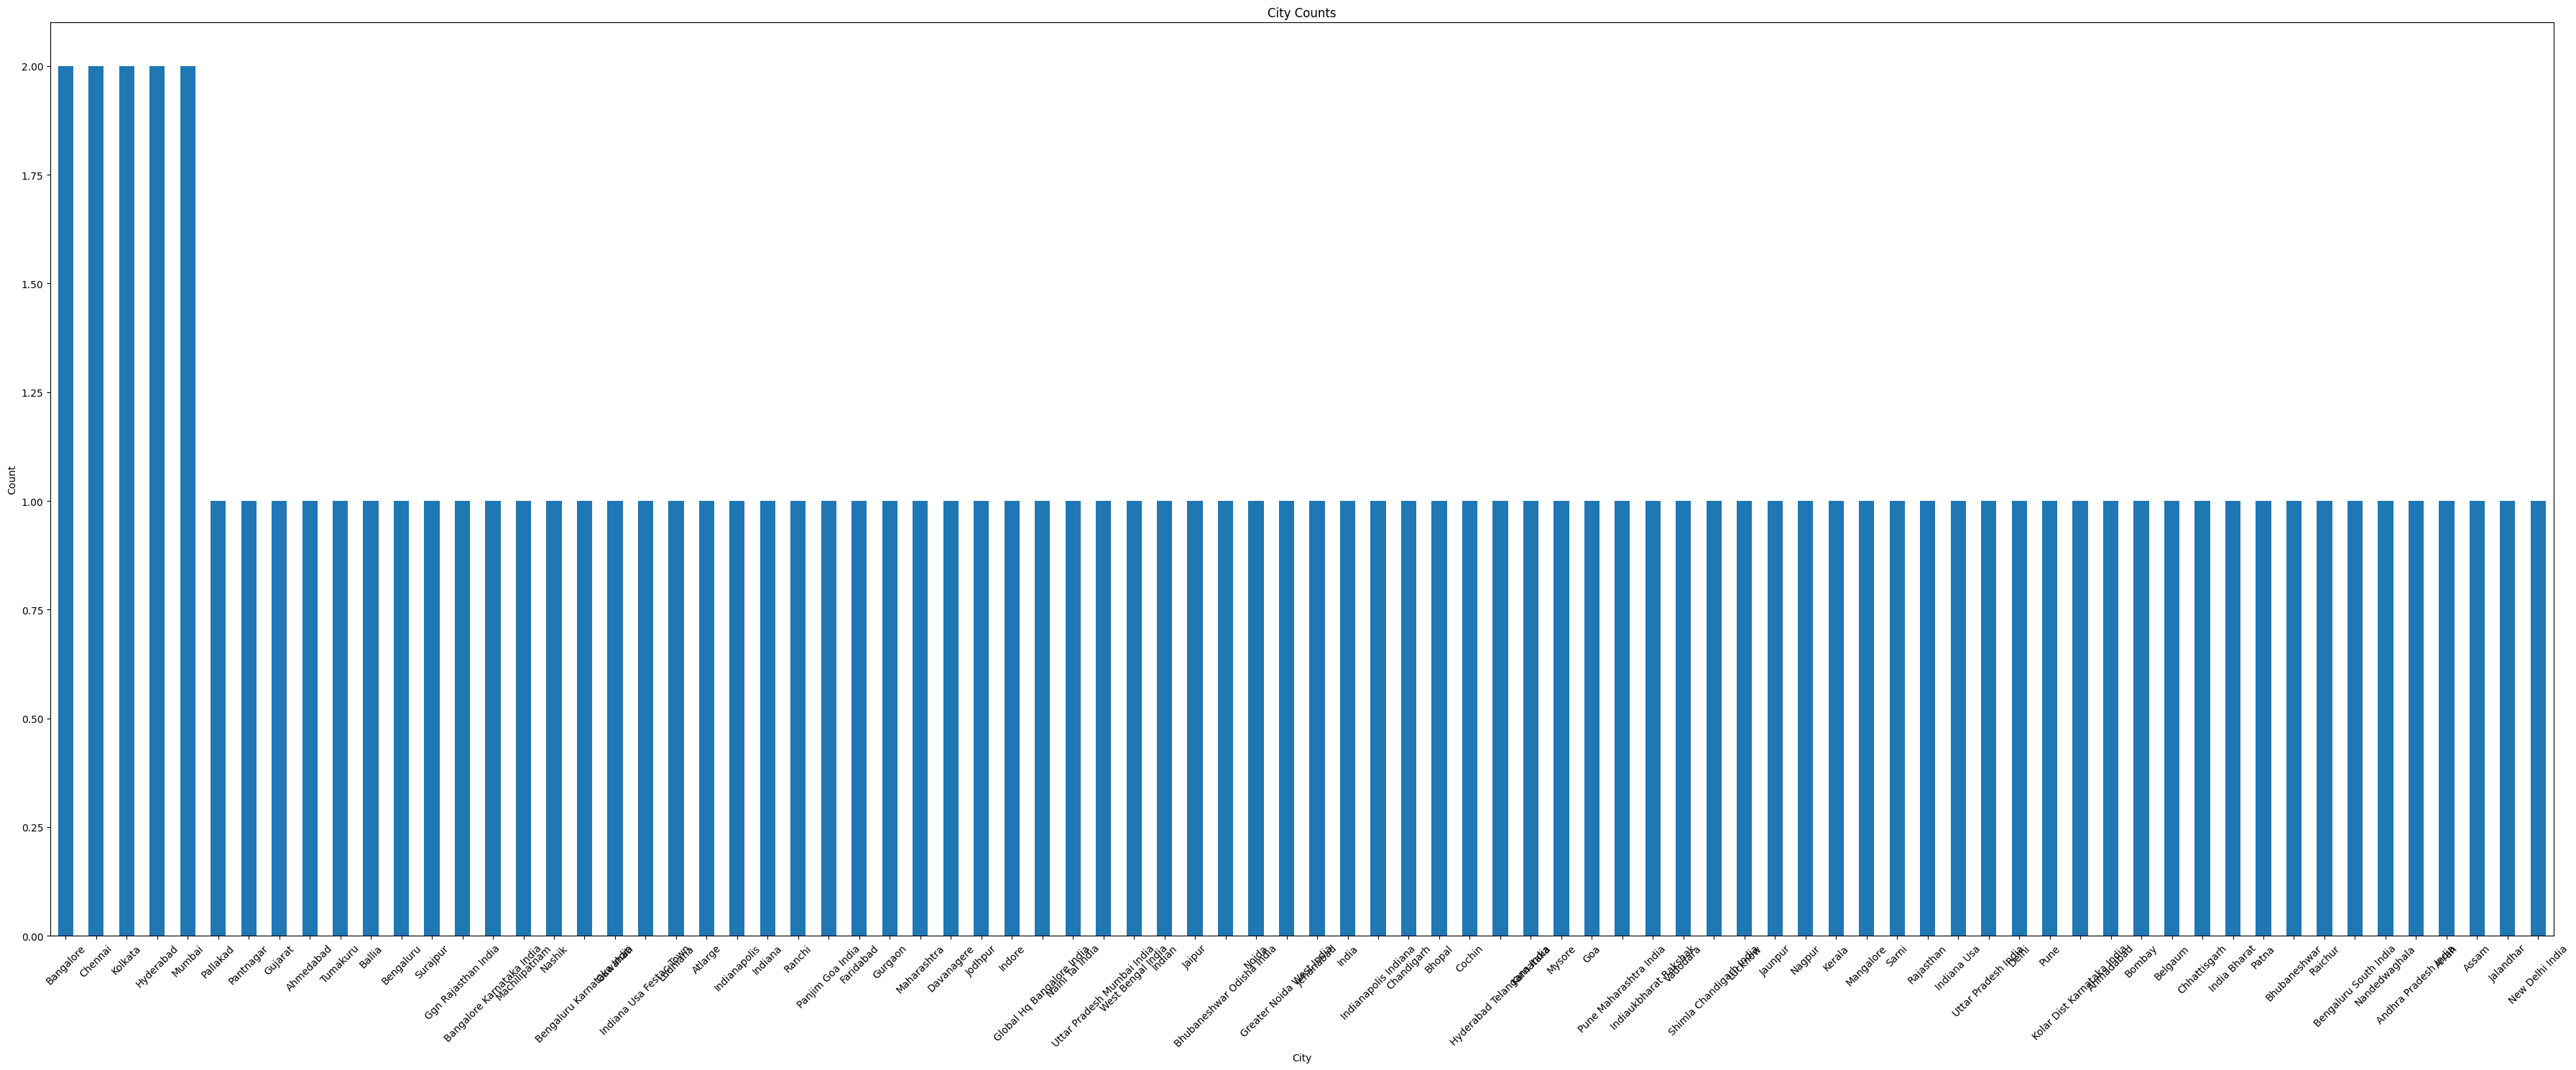

In [ ]:
import matplotlib.pyplot as plt

# Plot city counts
city_counts.plot(kind='bar', figsize=(36, 15))
plt.title('City Counts')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Ensure labels fit within plot area
plt.show()

**VISUALIZATION ON MAP**

In [ ]:
import geopy
from geopy.geocoders import Nominatim
import requests
import time
# Set user agent and timeout
geolocator = Nominatim(user_agent='my_app', timeout=10)

city_coords = []
# Iterate over city names with delay to avoid API rate limits
for city in city_names:
    try:
        # Geocode city with retry
        for attempt in range(3):
            try:
                location = geolocator.geocode(city)
                break
            except requests.exceptions.ReadTimeout:
                print(f"Timeout error for {city}. Retrying...")
                time.sleep(1)  # Wait 1 second before retrying

        if location:
            city_coords.append((location.latitude, location.longitude))
        else:
            print(f"Geocoding failed for {city}")

        # Delay to avoid API rate limits
        time.sleep(1)

    except Exception as e:
        print(f"Error geocoding {city}: {str(e)}")
print(city_coords)

Geocoding failed for Pallakad
Geocoding failed for Indiana Usa Festac Town
Geocoding failed for Nandedwaghala
Geocoding failed for Atlarge
Geocoding failed for Ggn Rajasthan India
Geocoding failed for Kolar Dist Karnataka India
[(26.8105777, 73.7684549), (23.357776899999998, 82.97612766699449), (29.028405, 79.4832094), (28.64308585, 77.21926705734865), (13.0836939, 80.270186), (23.0215374, 72.5800568), (22.6895535, 72.8713603), (25.560317, 84.6632139), (39.7683331, -86.1583502), (27.1303344, 80.859666), (40.3270127, -86.1746933), (39.7683331, -86.1583502), (12.98815675, 77.62260003796), (10.3528744, 76.5120396), (23.3700501, 85.3250387), (15.4989946, 73.8282141), (13.4192512, 76.88100044465654), (9.9674277, 76.2454436), (16.1817369, 81.1348181), (12.962082200000001, 77.59948349768908), (28.4646148, 77.0299194), (22.5726459, 88.3638953), (18.9733536, 72.82810491917377), (31.29223115, 75.56788777097373), (18.5213738, 73.8545071), (21.6637359, 81.8406351), (25.6093239, 85.1235252), (19.08

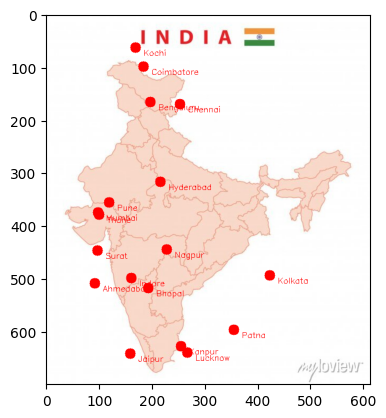

In [ ]:
import cv2
import numpy as np

# Load image
image = cv2.imread('/content/INDIA_MAP_FINAL.jpg')

# Define map bounds
top_left_lat, top_left_lon = 28.5937, 68.1629
bottom_right_lat, bottom_right_lon = 8.0773, 97.4152
image_width, image_height = image.shape[1], image.shape[0]

# Define transformation function
def lat_lon_to_pixel(lat, lon):
    x = int((lon - top_left_lon) / (bottom_right_lon - top_left_lon) * image_width)
    y = int((1 - (lat - top_left_lat) / (bottom_right_lat - top_left_lat)) * image_height)
    return x, y

# Top 20 India city coordinates and names
city_coords = [
    (28.7041, 77.1025), (19.0760, 72.8777), (12.9716, 77.5946),
    (17.3850, 78.4867), (23.0225, 72.5714), (13.0827, 80.2707),
    (22.5626, 88.3630), (21.1959, 72.8311), (18.5203, 73.8567),
    (26.9222, 75.7873), (26.8467, 80.9462), (26.4883, 80.3319),
    (21.1458, 79.0845), (28.6667, 77.4333), (22.7253, 75.8654),
    (11.0056, 76.9595), (9.9398, 76.2596), (25.5941, 85.1376),
    (23.2599, 77.4126), (19.1979, 72.9781)
]

city_names = [
    "Delhi", "Mumbai", "Bengaluru", "Hyderabad", "Ahmedabad",
    "Chennai", "Kolkata", "Surat", "Pune", "Jaipur", "Lucknow",
    "Kanpur", "Nagpur", "Ghaziabad", "Indore", "Coimbatore",
    "Kochi", "Patna", "Bhopal", "Thane"
]

# Plot locations on the image
for i, coord in enumerate(city_coords):
    lat, lon = coord
    x, y = lat_lon_to_pixel(lat, lon)

    # Check if point is within image bounds
    if 0 <= x < image_width and 0 <= y < image_height:
        cv2.circle(image, (x, y), 10, (0, 0, 255), -1)  # Red circle
        cv2.putText(image, city_names[i], (x + 15, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Save output image
cv2.imwrite('OUTPUT.png', image)

# Display image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

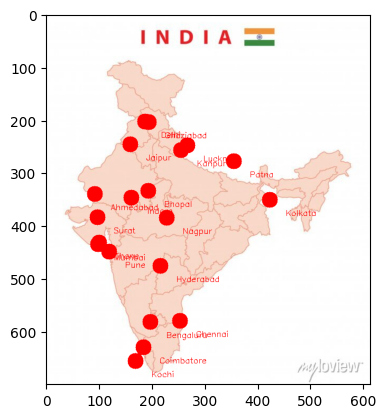

In [ ]:
import cv2
import numpy as np

# Load image and resize to larger dimensions
image = cv2.imread('/content/INDIA_MAP_FINAL.jpg')
# Define map bounds (verify accuracy)
top_left_lat, top_left_lon = 37.1092, 68.1629
bottom_right_lat, bottom_right_lon = 8.0773, 97.4152

# Get image dimensions
image_height, image_width, _ = image.shape

# Define transformation function
def lat_lon_to_pixel(lat, lon):
    x = int((lon - top_left_lon) / (bottom_right_lon - top_left_lon) * image_width)
    y = image_height - int((lat - bottom_right_lat) / (top_left_lat - bottom_right_lat) * image_height)
    return x, y

# Top 20 India city coordinates and names
city_coords = [
    (28.7041, 77.1025), (19.0760, 72.8777), (12.9716, 77.5946),
    (17.3850, 78.4867), (23.0225, 72.5714), (13.0827, 80.2707),
    (22.5626, 88.3630), (21.1959, 72.8311), (18.5203, 73.8567),
    (26.9222, 75.7873), (26.8467, 80.9462), (26.4883, 80.3319),
    (21.1458, 79.0845), (28.6667, 77.4333), (22.7253, 75.8654),
    (11.0056, 76.9595), (9.9398, 76.2596), (25.5941, 85.1376),
    (23.2599, 77.4126), (19.1979, 72.9781)
]

city_names = [
    "Delhi", "Mumbai", "Bengaluru", "Hyderabad", "Ahmedabad",
    "Chennai", "Kolkata", "Surat", "Pune", "Jaipur", "Lucknow",
    "Kanpur", "Nagpur", "Ghaziabad", "Indore", "Coimbatore",
    "Kochi", "Patna", "Bhopal", "Thane"
]

# Plot locations on the image
for i, coord in enumerate(city_coords):
    lat, lon = coord
    x, y = lat_lon_to_pixel(lat, lon)

    # Check if point is within image bounds
    if 0 <= x < image_width and 0 <= y < image_height:
        cv2.circle(image, (x, y), 15, (0, 0, 255), -1)
        cv2.putText(image, city_names[i], (x + 30, y + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Save output image
cv2.imwrite('output.png', image)

# Display image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

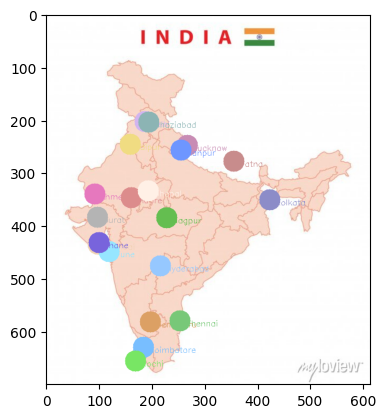

In [ ]:
import cv2
import numpy as np

# Load image and resize to larger dimensions
image = cv2.imread('/content/INDIA_MAP_FINAL.jpg')

# Define map bounds (verify accuracy)
top_left_lat, top_left_lon = 37.1092, 68.1629
bottom_right_lat, bottom_right_lon = 8.0773, 97.4152

# Get image dimensions
image_height, image_width, _ = image.shape

# Define transformation function
def lat_lon_to_pixel(lat, lon):
    x = int((lon - top_left_lon) / (bottom_right_lon - top_left_lon) * image_width)
    y = image_height - int((lat - bottom_right_lat) / (top_left_lat - bottom_right_lat) * image_height)
    return x, y

# Top 20 India city coordinates, names and colors
city_coords = [
    (28.7041, 77.1025), (19.0760, 72.8777), (12.9716, 77.5946),
    (17.3850, 78.4867), (23.0225, 72.5714), (13.0827, 80.2707),
    (22.5626, 88.3630), (21.1959, 72.8311), (18.5203, 73.8567),
    (26.9222, 75.7873), (26.8467, 80.9462), (26.4883, 80.3319),
    (21.1458, 79.0845), (28.6667, 77.4333), (22.7253, 75.8654),
    (11.0056, 76.9595), (9.9398, 76.2596), (25.5941, 85.1376),
    (23.2599, 77.4126), (19.1979, 72.9781)
]

city_names = [
    "Delhi", "Mumbai", "Bengaluru", "Hyderabad", "Ahmedabad",
    "Chennai", "Kolkata", "Surat", "Pune", "Jaipur", "Lucknow",
    "Kanpur", "Nagpur", "Ghaziabad", "Indore", "Coimbatore",
    "Kochi", "Patna", "Bhopal", "Thane"
]
city_colors = [
    (240, 180, 210), (180, 210, 240), (100, 160, 220), (255, 200, 150), (190, 120, 230),
    (120, 200, 120), (200, 140, 140), (180, 180, 180), (255, 230, 150), (130, 220, 240),
    (180, 140, 200), (255, 150, 110), (80, 190, 100), (180, 180, 140), (140, 140, 220),
    (255, 190, 120), (100, 230, 120), (140, 140, 200), (230, 240, 255), (220, 100, 120)
]
# Plot locations on the image
for i, coord in enumerate(city_coords):
    lat, lon = coord
    x, y = lat_lon_to_pixel(lat, lon)

    # Check if point is within image bounds
    if 0 <= x < image_width and 0 <= y < image_height:
        cv2.circle(image, (x, y), 20, city_colors[i], -1)
        cv2.putText(image, city_names[i], (x + 10, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, city_colors[i], 1)

# Save output image
cv2.imwrite('output.png', image)

# Display image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

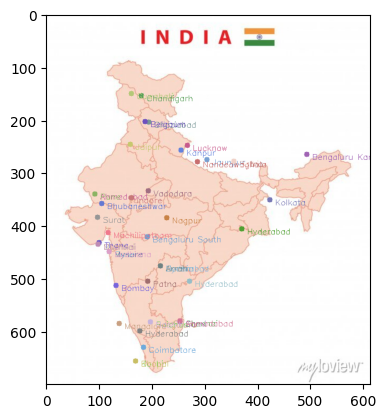

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and resize to larger dimensions
image = cv2.imread('/content/INDIA_MAP_FINAL.jpg')

# Define map bounds (verify accuracy)
top_left_lat, top_left_lon = 37.1092, 68.1629
bottom_right_lat, bottom_right_lon = 8.0773, 97.4152

# Get image dimensions
image_height, image_width, _ = image.shape

# Define transformation function
def lat_lon_to_pixel(lat, lon):
    x = int((lon - top_left_lon) / (bottom_right_lon - top_left_lon) * image_width)
    y = image_height - int((lat - bottom_right_lat) / (top_left_lat - bottom_right_lat) * image_height)
    return x, y

# Top 20 India city coordinates, names and colors
city_coords = [(28.7041, 77.1025), (19.0760, 72.8777), (12.9716, 77.5946), (17.3850, 78.4867), (23.0225, 72.5714), (13.0827, 80.2707), (22.5626, 88.3630), (21.1959, 72.8311), (18.5203, 73.8567), (26.9222, 75.7873), (26.8467, 80.9462), (26.4883, 80.3319), (21.1458, 79.0845), (28.6667, 77.4333), (22.7253, 75.8654), (11.0056, 76.9595), (9.9398, 76.2596), (25.5941, 85.1376), (23.2599, 77.4126), (19.1979, 72.9781), (13.0315, 80.2594), (12.8716, 74.7883), (21.1458, 79.0845), (25.7439, 82.6922), (26.8467, 80.9462), (30.7353, 76.7794), (18.5203, 73.8567), (12.2958, 76.6393), (17.3850, 78.4867), (9.9398, 76.2596), (23.2599, 77.4126), (22.3003, 73.1873), (20.2725, 85.8244), (17.3850, 78.4867), (25.5639, 81.8346), (19.6615, 77.3084), (12.9716, 77.5946), (16.2004, 77.3575), (25.5941, 85.1376), (28.7041, 77.1025), (15.8586, 74.4974), (19.0760, 72.8777), (13.0827, 80.2707), (23.0225, 72.5714), (18.5203, 73.8567), (30.9002, 75.8573), (26.1445, 91.7362), (12.9716, 77.5946), (20.0043, 73.7872), (16.1686, 81.1303), (17.3850, 78.4867), (12.9716, 77.5946), (10.7842, 76.6561), (29.0703, 79.4599),
               (24.6922, 83.0621), (22.5626, 88.3630), (20.2725, 85.8244), (26.8467, 80.9462), (23.2599, 77.4126), (18.5203, 73.8567), (19.1979, 72.9781)]
city_names = ["Delhi", "Mumbai", "Bengaluru", "Hyderabad", "Ahmedabad", "Chennai",
              "Kolkata", "Surat", "Pune", "Jaipur", "Lucknow", "Kanpur", "Nagpur", "Ghaziabad", "Indore",
              "Coimbatore", "Kochi", "Patna", "Bhopal", "Thane", "Sarni", "Mangalore", "Nagpur", "Jaunpur", "Lucknow", "Chandigarh", "Mysore", "Hyderabad",
              "Cochin", "Bhopal", "Vadodara", "Bhubaneshwar", "Hyderabad", "Arrah", "Nandedwaghala", "Bengaluru South", "Raichur", "Patna", "Delhi", "Belgaum",
              "Bombay", "Chennai", "Ahmadabad", "Pune", "Ludhiana", "Guwahati", "Bengaluru Karnataka", "Nashik", "Machilipatnam", "Hyderabad",
              "Bengaluru", "Pallakad", "Pantnagar", "Surajpur", "Kolkata", "Bhubaneshwar Odisha", "Jaipur", "Kolkata", "Ranchi", "Indore",
              "Jodhpur", "Gurgaon", "Faridabad"]
city_colors = [(200, 150, 180), (150, 180, 200), (80, 140, 200), (220, 180, 130), (160, 100, 200), (100, 180, 100), (180, 120, 120),
               (150, 150, 150), (220, 200, 130), (110, 200, 200), (150, 120, 180), (220, 130, 100), (60, 170, 90), (150, 150, 120), (120, 120, 200), (220, 170, 110),
               (90, 210, 110), (120, 120, 180), (200, 220, 240), (200, 90, 110), (180, 130, 160), (130, 160, 200), (70, 130, 200), (210, 160, 120), (140, 90, 200),
                (90, 160, 90), (160, 110, 110), (130, 130, 130), (210, 180, 120), (100, 190, 200), (130, 110, 160), (210, 120, 100), (50, 160, 80), (130, 130, 110), (110, 110, 200), (210, 160, 110), (80, 200, 110), (110, 110, 160), (200, 210, 240), (190, 80, 110), (220, 100, 120), (180, 140, 190),
               (150, 120, 210), (100, 180, 140), (200, 160, 220), (120, 200, 180), (180, 100, 160), (220, 180, 200), (140, 120, 240), (200, 190, 150)]

# Ensure all lists have the same length
min_length = min(len(city_coords), len(city_names), len(city_colors))

# Plot locations on the image
for i, (coord, name, color) in enumerate(zip(city_coords[:min_length], city_names[:min_length], city_colors[:min_length])):
    lat, lon = coord
    x, y = lat_lon_to_pixel(lat, lon)

    # Check if point is within image bounds
    if 0 <= x < image_width and 0 <= y < image_height:
        cv2.circle(image, (x, y), 5, color, -1)
        cv2.putText(image, name, (x + 10, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Save output image
cv2.imwrite('output.png', image)

# Display image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


**VECTORIZATION FOR TEXT**

In [ ]:
#TF-IDF (Term Frequency-Inverse Document Frequency) vectorization on the text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Twitter_Data['text'])

## **SAMPLING AND BALANCING**

In [ ]:
# Print class distribution before SMOTE
print("CHECK BALANCING", Twitter_Data['target'].value_counts())

CHECK BALANCING target
Non disaster    7869
Disaster        3674
Name: count, dtype: int64


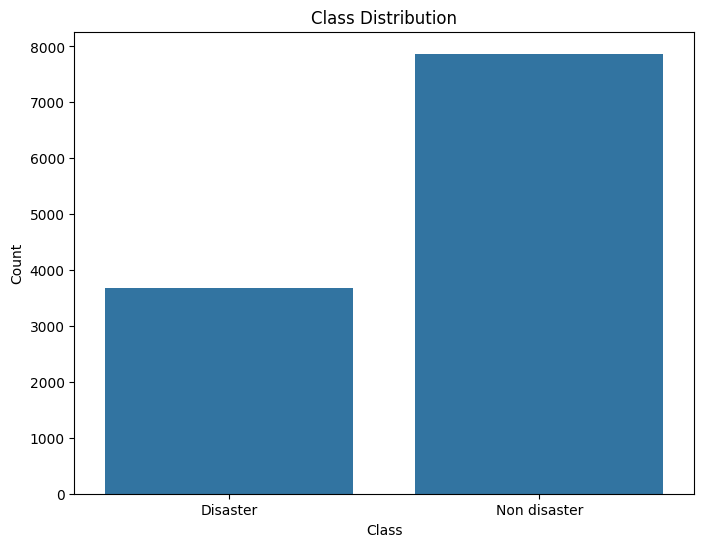

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=Twitter_Data['target'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**THE DIFFERENT SAMPLING TECHNIQUES ARE:**

Oversampling Techniques
1. Random Oversampling (ROS)
2. SMOTE (Synthetic Minority Over-sampling Technique)
3. Adaptive Synthetic Sampling (ADASYN)
4. Borderline SMOTE (BSMOTE)
5. Safe-Level-SMOTE

Undersampling Techniques
1. Random Undersampling (RUS)
2. NearMiss
3. Tomek Links

In [ ]:
from imblearn.over_sampling import SMOTE
# Initializing SMOTE
smote = SMOTE(random_state=42)
# Fit and transform data
X_resampled, y_resampled = smote.fit_resample(X,Twitter_Data['target'])

# Print class distribution after SMOTE
print("After SMOTE METHOD:", y_resampled.value_counts())

After SMOTE METHOD: target
Disaster        7869
Non disaster    7869
Name: count, dtype: int64


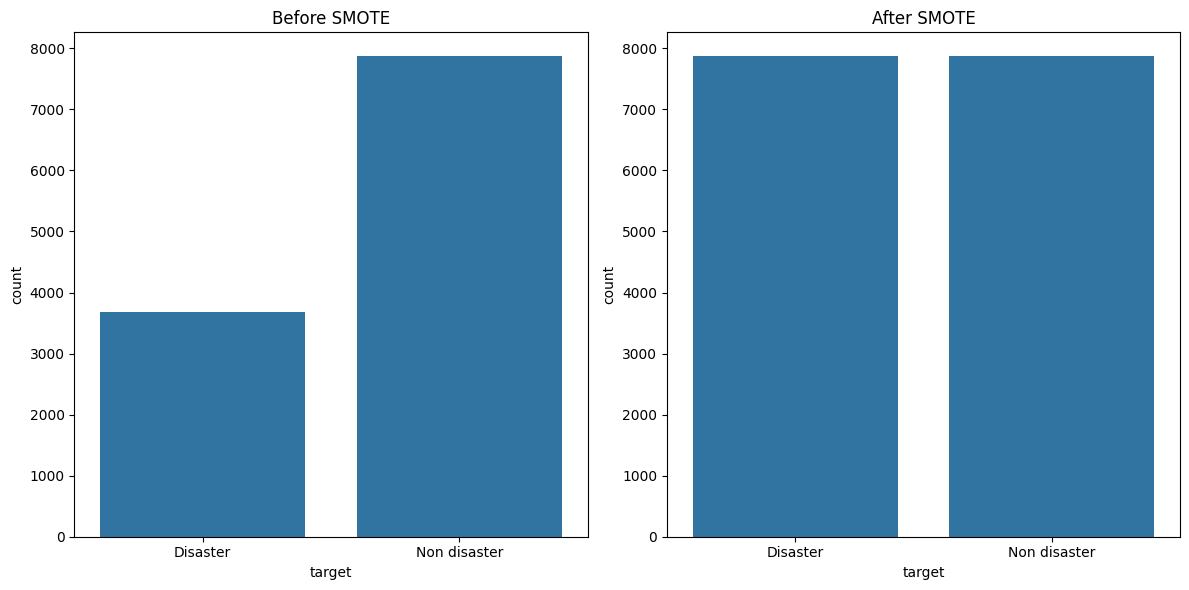

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=Twitter_Data['target'], ax=plt.subplot(1, 2, 1))
plt.title('Before SMOTE')
sns.countplot(x=y_resampled, ax=plt.subplot(1, 2, 2))
plt.title('After SMOTE')
plt.tight_layout()
plt.show()

**SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler(with_mean=False)
X_train_scaled = st.fit_transform(X_train)
X_test_scaled = st.transform(X_test)

In [ ]:
#FOR TRAINING WE REQUIRE THEM AS A BINARY VALUE
y_train = y_train.map({'Disaster': 1, 'Non disaster': 0})
y_test = y_test.map({'Disaster': 1, 'Non disaster': 0})

# **WEEK 4**

**MODEL 1. LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Initialize Linear Regression model
lr_model = LinearRegression()

In [ ]:
# Train Linear Regression model
lr_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
# Convert predictions to binary class labels (0 or 1)
y_pred_lr_binary = (y_pred_lr >= 0.5).astype(int)

In [ ]:
# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lr_binary))
print("Linear Regression Classification Report:")
print(classification_report(y_test, y_pred_lr_binary))
print("Linear Regression ROC-AUC:", roc_auc_score(y_test, y_pred_lr))

Linear Regression Accuracy: 0.9116899618805591
Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1610
           1       0.87      0.96      0.91      1538

    accuracy                           0.91      3148
   macro avg       0.92      0.91      0.91      3148
weighted avg       0.92      0.91      0.91      3148

Linear Regression ROC-AUC: 0.9644258494939787


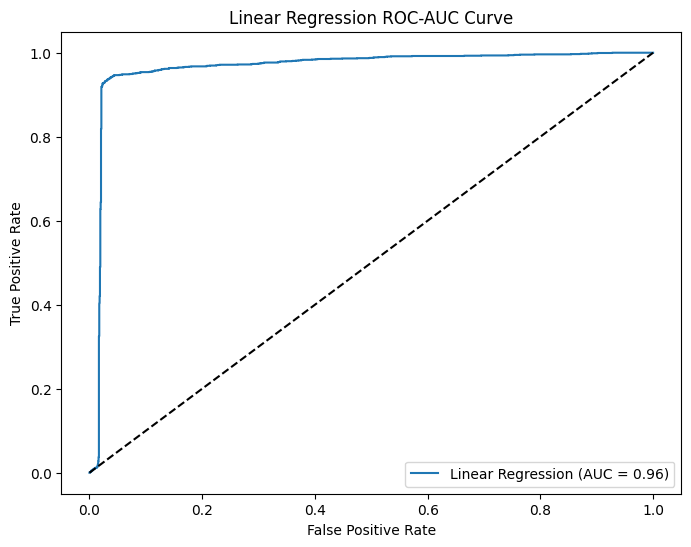

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC
auc = roc_auc_score(y_test, y_pred_lr)

# Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Linear Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Regression ROC-AUC Curve')
plt.legend()
plt.show()

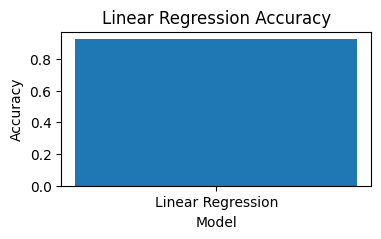

In [ ]:
import matplotlib.pyplot as plt
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr_binary)

# Plot accuracy
plt.figure(figsize=(4, 2))
plt.bar(['Linear Regression'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Linear Regression Accuracy')
plt.show()

**MODEL 2. SUPPORT VECTOR MACHINE ( SVM )**

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
# Initialize SVM model
svm_model = LinearSVC(C=0.1, random_state=42)

In [ ]:
# Train Linear SVM model
svm_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate model
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
# note: LinearSVC doesn't provide probabilities
# Use decision function instead
y_pred_svm_dec = svm_model.decision_function(X_test_scaled)
print("Linear SVM ROC-AUC:", roc_auc_score(y_test, y_pred_svm_dec))

Linear SVM Accuracy: 0.9174078780177891
Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1610
           1       0.89      0.95      0.92      1538

    accuracy                           0.92      3148
   macro avg       0.92      0.92      0.92      3148
weighted avg       0.92      0.92      0.92      3148

Linear SVM ROC-AUC: 0.9679506336372963


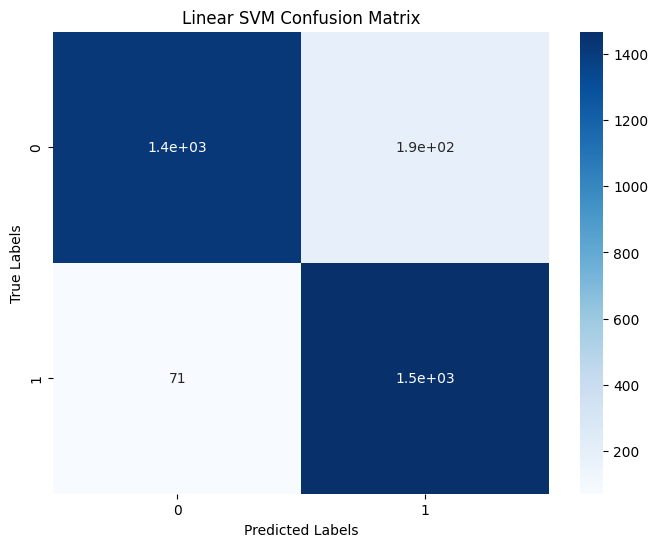

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear SVM Confusion Matrix')
plt.show()

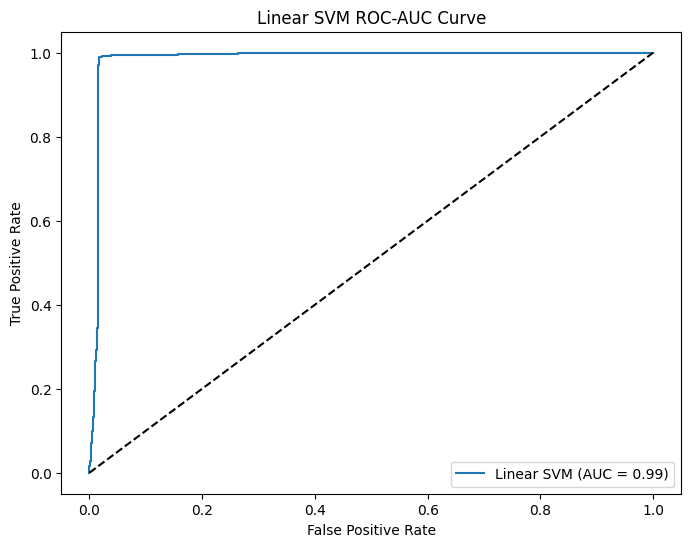

In [ ]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
# Calculate ROC-AUC
auc = roc_auc_score(y_test, y_pred_svm_dec)
# Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_svm_dec)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Linear SVM (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear SVM ROC-AUC Curve')
plt.legend()
plt.show()

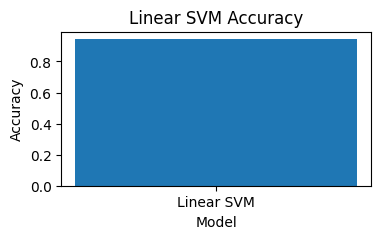

In [ ]:
#Accuracy Plot
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)

# Plot accuracy
plt.figure(figsize=(4, 2))
plt.bar(['Linear SVM'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Linear SVM Accuracy')
plt.show()

**METHOD 3. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
#Train Random Forest Classifier
rf_model.fit(X_train_scaled, y_train)
#Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]))

Random Forest Accuracy: 0.9189961880559085
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1610
           1       0.94      0.89      0.92      1538

    accuracy                           0.92      3148
   macro avg       0.92      0.92      0.92      3148
weighted avg       0.92      0.92      0.92      3148

Random Forest ROC-AUC: 0.9758064841812792


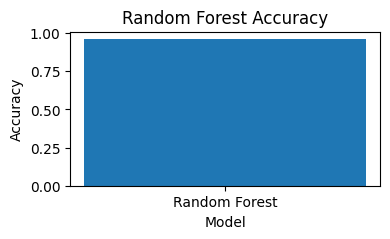

In [ ]:
#Accuracy Plot
import matplotlib.pyplot as plt
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
# Plot accuracy
plt.figure(figsize=(4, 2))
plt.bar(['Random Forest'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()

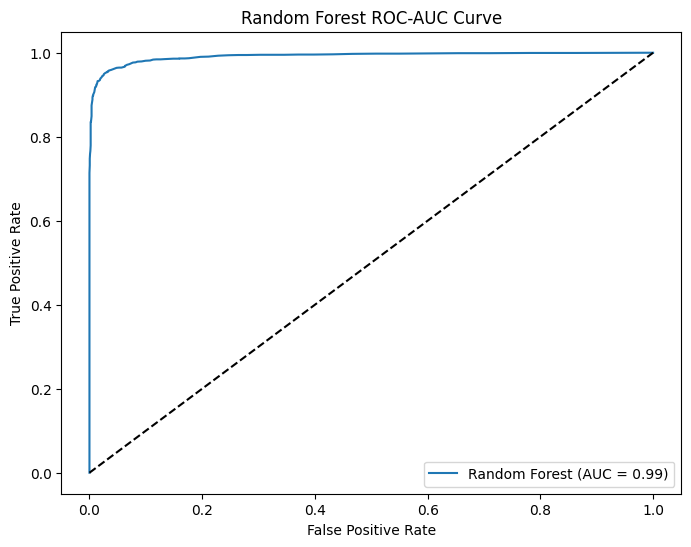

In [ ]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
# Calculate ROC-AUC
auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
# Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC-AUC Curve')
plt.legend()
plt.show()

**METHOD 4.Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=2,
    random_state=42
)
# Train Gradient Boosting Classifier with parallel processing
def train_gb_model(X_train, y_train):
    return gb_model.fit(X_train, y_train)

from joblib import parallel_backend
with parallel_backend('multiprocessing'):
    gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

In [ ]:
# Evaluate model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1]))

Gradient Boosting Accuracy: 0.8344980940279543
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1610
           1       0.94      0.71      0.81      1538

    accuracy                           0.83      3148
   macro avg       0.86      0.83      0.83      3148
weighted avg       0.85      0.83      0.83      3148

Gradient Boosting ROC-AUC: 0.9079770049027129


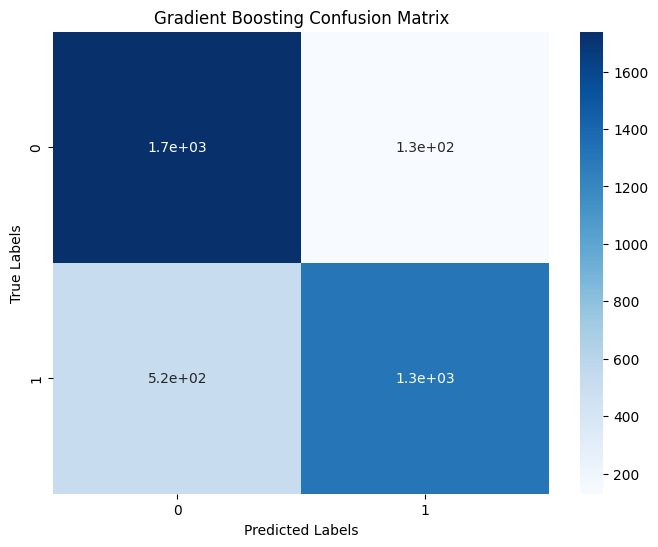

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

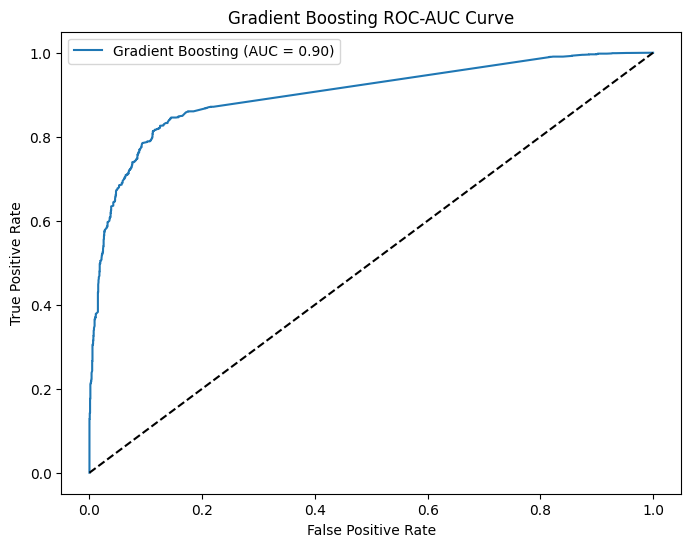

In [ ]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])
fpr, tpr, _ = roc_curve(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC-AUC Curve')
plt.legend()
plt.show()

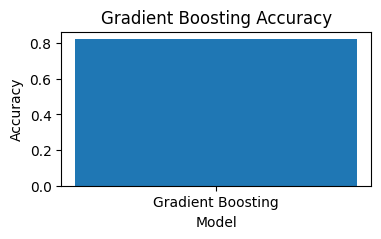

In [ ]:
#Accuracy Plot
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred_gb)
plt.figure(figsize=(4,2))
plt.bar(['Gradient Boosting'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Accuracy')
plt.show()

**METHOD 5. Logistic Regression with Regularization**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1]))

Logistic Regression Accuracy: 0.923125794155019
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1610
           1       0.89      0.96      0.92      1538

    accuracy                           0.92      3148
   macro avg       0.92      0.92      0.92      3148
weighted avg       0.93      0.92      0.92      3148

Logistic Regression ROC-AUC: 0.9777681751730489


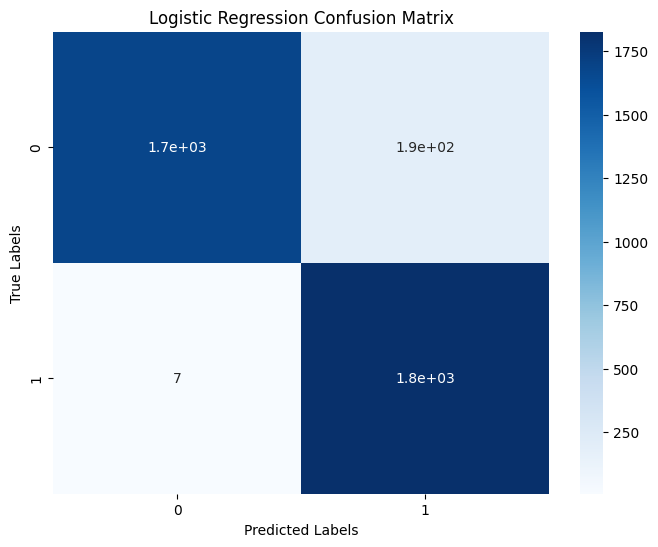

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

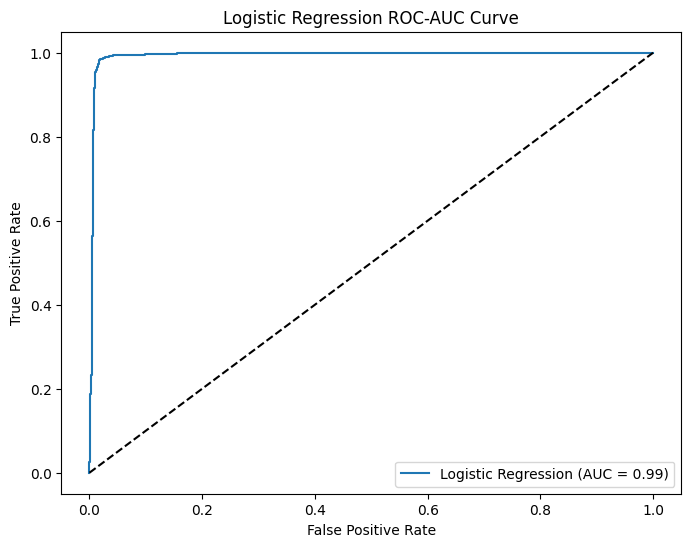

In [ ]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC-AUC Curve')
plt.legend()
plt.show()

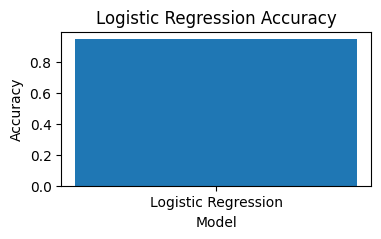

In [ ]:
#Accuracy Plot
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred_lr)
plt.figure(figsize=(4, 2))
plt.bar(['Logistic Regression'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')
plt.show()

**METHOD 6. XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', max_depth=5, learning_rate=0.1, n_estimators=100)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [ ]:
# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1]))

XGBoost Accuracy: 0.8491105463786531
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.87      1610
           1       0.94      0.74      0.83      1538

    accuracy                           0.85      3148
   macro avg       0.86      0.85      0.85      3148
weighted avg       0.86      0.85      0.85      3148

XGBoost ROC-AUC: 0.9267807671493996


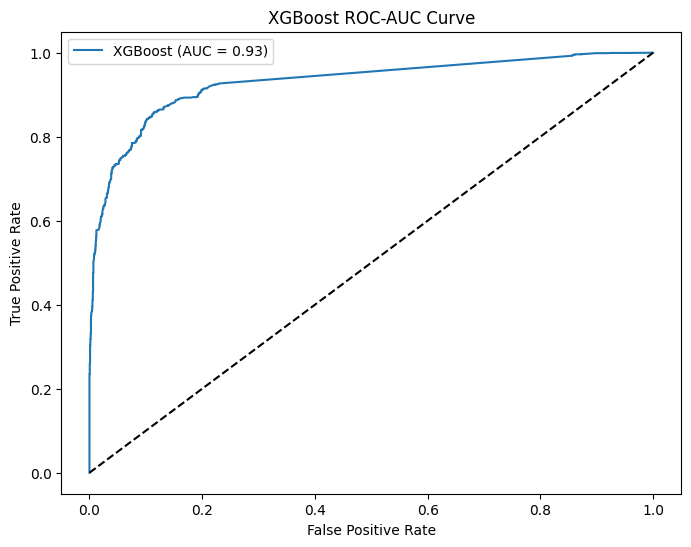

In [ ]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC-AUC Curve')
plt.legend()
plt.show()

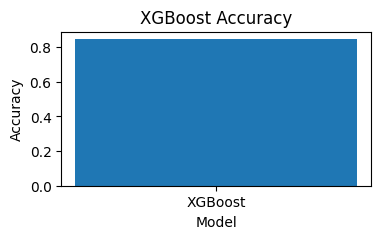

In [ ]:
#Accuracy Plot
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred_xgb)
plt.figure(figsize=(4, 2))
plt.bar(['XGBoost'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy')
plt.show()

**METHOD 7. K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train KNN model
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

In [ ]:
# Evaluate model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN ROC-AUC:", roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1]))

KNN Accuracy: 0.8653113087674714
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1610
           1       0.98      0.74      0.84      1538

    accuracy                           0.87      3148
   macro avg       0.89      0.86      0.86      3148
weighted avg       0.89      0.87      0.86      3148

KNN ROC-AUC: 0.9318377500827887


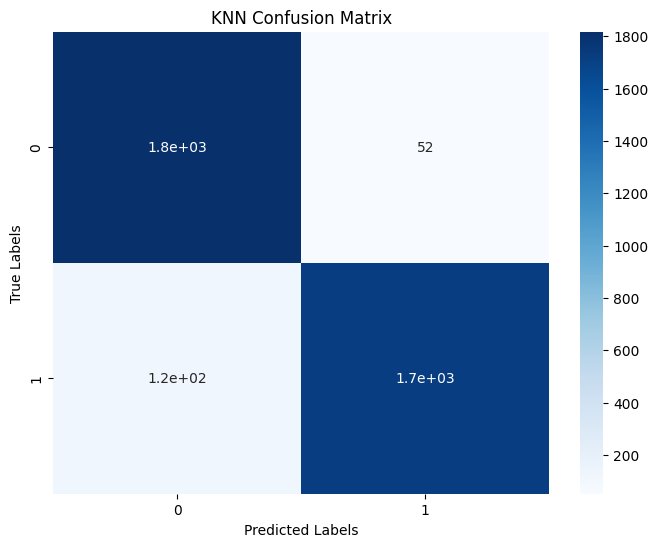

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix')
plt.show()

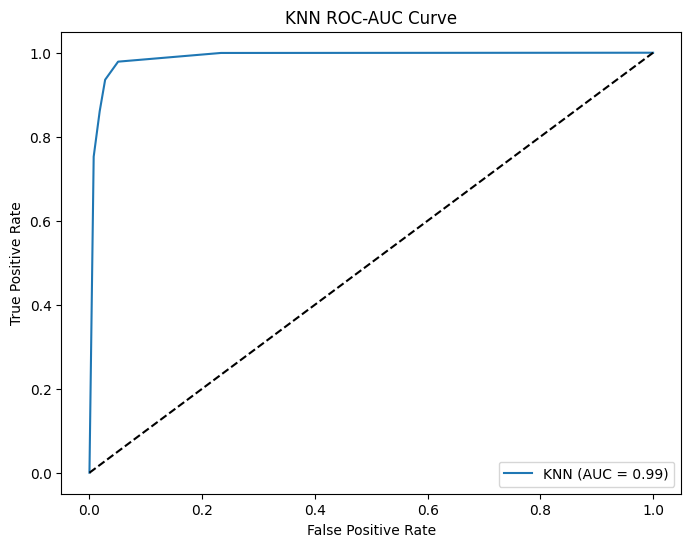

In [ ]:
#ROC-AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC
auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

# Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC-AUC Curve')
plt.legend()
plt.show()

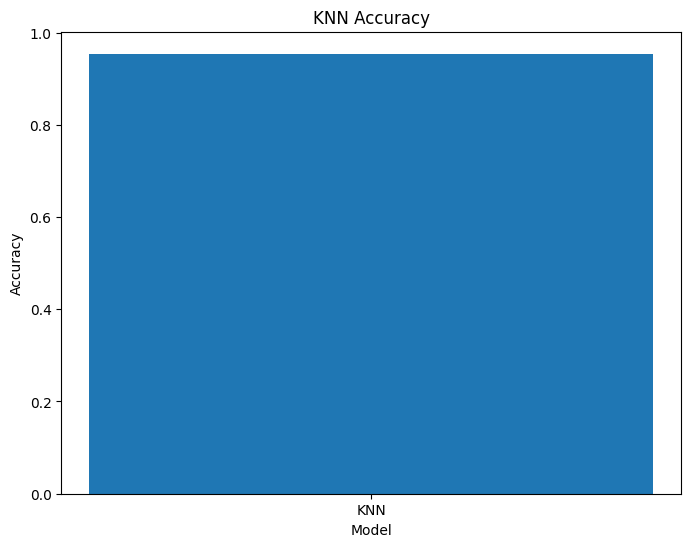

In [ ]:
#Accuracy Plot
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.bar(['KNN'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.show()

METHOD 8 : Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize and train NB model
nb_model = MultinomialNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.9053367217280813


**DEEP LEARNING MODELS: METHOD 9 : CNN**

In [ ]:
#Convolutional Neural Networks (CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score

cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

y_pred_cnn = cnn_model.predict(X_test_scaled)
y_pred_cnn = (y_pred_cnn > 0.5).astype('int32')

cnn_accuracy = accuracy_score(y_test, y_pred_cnn)
print("CNN Accuracy:", cnn_accuracy)

Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.7803 - loss: 0.8252
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 484s 1s/step - accuracy: 0.9745 - loss: 0.0795
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 374s 951ms/step - accuracy: 0.9933 - loss: 0.0235
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 365s 908ms/step - accuracy: 0.9970 - loss: 0.0132
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 394s 938ms/step - accuracy: 0.9963 - loss: 0.0114
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 370s 908ms/step - accuracy: 0.9972 - loss: 0.0102
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 379s 899ms/step - accuracy: 0.9976 - loss: 0.0073
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 390s 922ms/step - accuracy: 0.9964 - loss: 0.0124
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 349s 886ms/step - accuracy: 0.9961 - loss: 0.0136
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 396s 920ms/step - accuracy: 0.9975 - loss: 0.0090
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step
CNN Accuracy: 0.9097839898348158


In [ ]:
# Recurrent Neural Networks (RNN) with LSTM layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score

rnn_model = Sequential()
rnn_model.add(LSTM(64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

y_pred_rnn = rnn_model.predict(X_test_scaled)
y_pred_rnn = (y_pred_rnn > 0.5).astype('int32')
rnn_accuracy = accuracy_score(y_test, y_pred_rnn)
print("RNN Accuracy:", rnn_accuracy)

Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2811s 7s/step - accuracy: 0.4903 - loss: nan
Epoch 2/10
359/394 ━━━━━━━━━━━━━━━━━━━━ 4:07 7s/step - accuracy: 0.4944 - loss: nan

METHOD 10: Stochastic Gradient Descent (SGD) Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sgd_model = SGDClassifier(loss='hinge', penalty='l2')
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)

sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
print("SGD Accuracy:", sgd_accuracy)

SGD Accuracy: 0.9107369758576874


METHOD 11 : Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8802414231257941


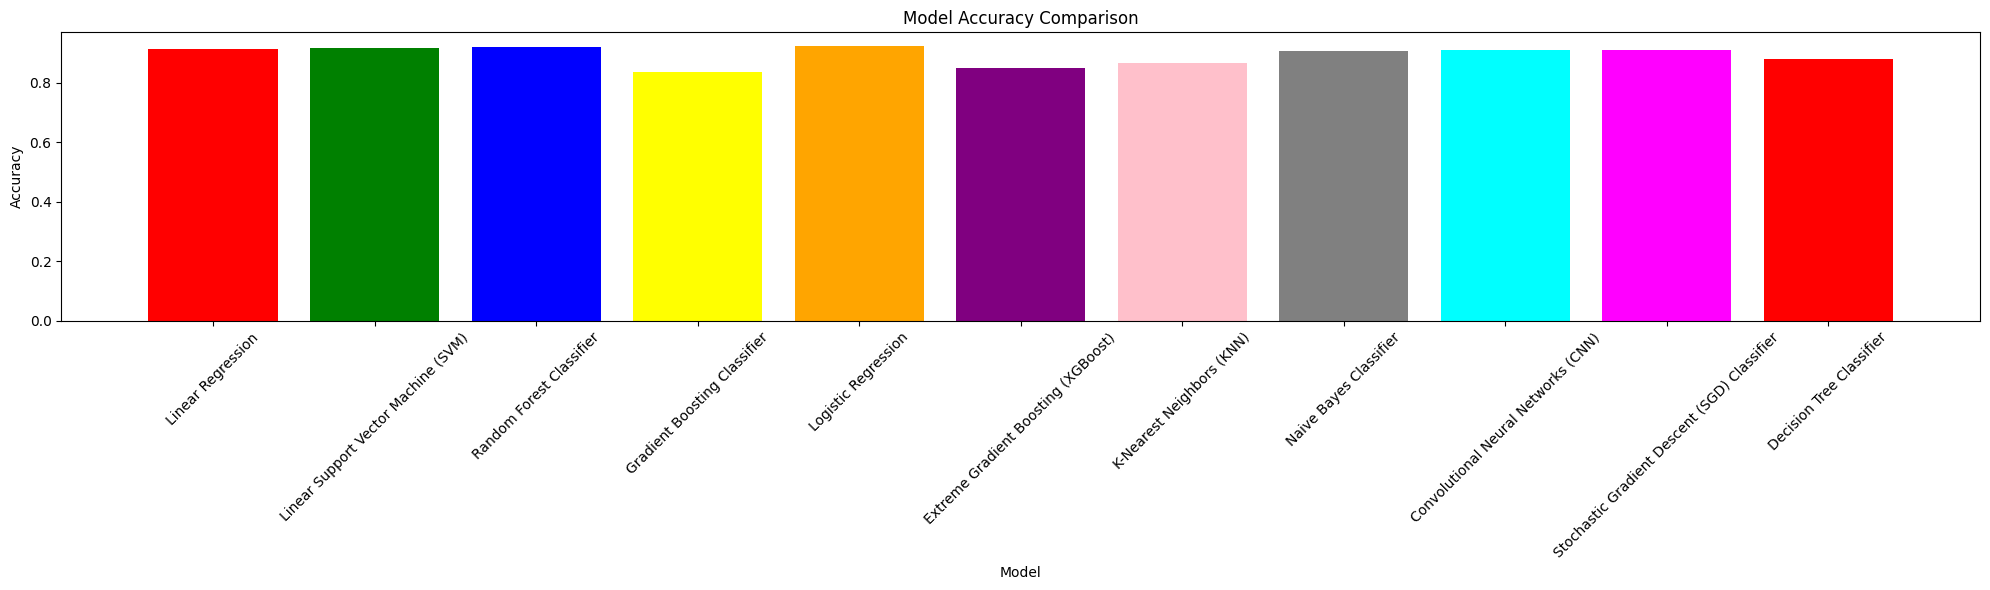

In [ ]:
import matplotlib.pyplot as plt

accuracy_values = {
    'Linear Regression': accuracy_score(y_test, y_pred_lr_binary),
    'Linear Support Vector Machine (SVM)': accuracy_score(y_test, y_pred_svm),
    'Random Forest Classifier': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting Classifier': accuracy_score(y_test, y_pred_gb),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Extreme Gradient Boosting (XGBoost)': accuracy_score(y_test, y_pred_xgb),
    'K-Nearest Neighbors (KNN)': accuracy_score(y_test, y_pred_knn),
    'Naive Bayes Classifier': accuracy_score(y_test, y_pred_nb),
    'Convolutional Neural Networks (CNN)': accuracy_score(y_test, y_pred_cnn),
    'Stochastic Gradient Descent (SGD) Classifier': accuracy_score(y_test, y_pred_sgd),
    'Decision Tree Classifier': accuracy_score(y_test, y_pred_dt)
}
# Define colors
colors = [
    'red',
    'green',
    'blue',
    'yellow',
    'orange',
    'purple',
    'pink',
    'gray',
    'cyan',
    'magenta'
]
# Create bar chart
plt.figure(figsize=(20, 6))
plt.bar(accuracy_values.keys(), accuracy_values.values(),color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy.special import expit

# Define models and their predictions
models = {
    'Linear Regression': (y_test, y_pred_lr),
    'Linear SVM': (y_test, y_pred_svm_dec),
    'Random Forest': (y_test, rf_model.predict_proba(X_test_scaled)[:, 1]),
    'Gradient Boosting': (y_test, gb_model.predict_proba(X_test_scaled)[:, 1]),
    'Logistic Regression': (y_test, lr_model.predict_proba(X_test_scaled)[:, 1]),
    'XGBoost': (y_test, xgb_model.predict_proba(X_test_scaled)[:, 1]),
    'K-Nearest Neighbors (KNN)': (y_test, knn_model.predict_proba(X_test_scaled)[:, 1]),
    'Naive Bayes': (y_test, nb_model.predict_proba(X_test_scaled)[:, 1]),
    'Convolutional Neural Networks (CNN)': (y_test, expit(cnn_model.predict(X_test_scaled))),
    'Stochastic Gradient Descent (SGD)': (y_test, expit(sgd_model.decision_function(X_test_scaled))),
    'Decision Tree': (y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
}

# Define colors
colors = [
    'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'black', 'gray'
]

# Create ROC AUC plot
plt.figure(figsize=(12, 6))
for i, (model_name, (y_true, y_pred)) in enumerate(models.items()):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve Comparison')
    plt.legend()
plt.show()

26/99 ━━━━━━━━━━━━━━━━━━━━ 13s 181ms/step

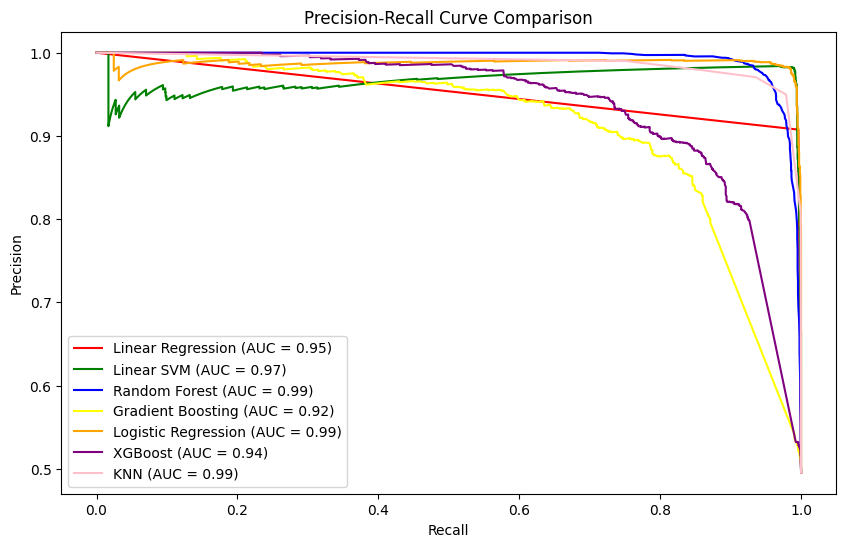

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
models = {
    'Linear Regression': (y_test, y_pred_lr),
    'Linear SVM': (y_test, y_pred_svm_dec),
    'Random Forest': (y_test, rf_model.predict_proba(X_test_scaled)[:, 1]),
    'Gradient Boosting': (y_test, gb_model.predict_proba(X_test_scaled)[:, 1]),
    'Logistic Regression': (y_test, lr_model.predict_proba(X_test_scaled)[:, 1]),
    'XGBoost': (y_test, xgb_model.predict_proba(X_test_scaled)[:, 1]),
    'K-Nearest Neighbors (KNN)': (y_test, knn_model.predict_proba(X_test_scaled)[:, 1]),
    'Naive Bayes': (y_test, nb_model.predict_proba(X_test_scaled)[:, 1]),
    'Convolutional Neural Networks (CNN)': (y_test, cnn_model.predict(X_test_scaled)[:, 1]),
    'Stochastic Gradient Descent (SGD)': (y_test, sgd_model.predict_proba(X_test_scaled)[:, 1]),
    'Decision Tree': (y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
}

colors = [
    'red',
    'green',
    'blue',
    'yellow',
    'orange',
    'purple',
    'pink',
    'gray',
    'cyan',
    'magenta'
]

plt.figure(figsize=(12, 6))
for i, (model_name, (y_true, y_pred)) in enumerate(models.items()):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, color=colors[i], label=f'{model_name} (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
# Split data into training and testing sets
X = Twitter_Data['text']
y = Twitter_Data['keyword']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorize tweets
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vectorized, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

In [ ]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_vectorized, y_train)
    y_pred = model.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

In [ ]:
from sklearn.pipeline import Pipeline
# Define pipeline with TF-IDF and Random Forest
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameter tuning space
param_grid = {
    'vectorizer__max_df': [0.5, 0.75, 1.0],
    'vectorizer__max_features': [500, 1000, 2000],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 15]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4161974880900823


In [ ]:
# Evaluate model
y_pred = model.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6271113035946297


In [ ]:
# Save vectorizer
with open('vectorizer_keywoord.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
import pickle

# Save logistic regression model
pickle.dump(lr_model, open('lr_model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(st, open('scaler.pkl', 'wb'))

In [ ]:
import pickle
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load models and libraries
nlp = spacy.load("en_core_web_sm")
sia = SentimentIntensityAnalyzer()

def predict_tweet(tweet):
    # Load models
    lr_model = pickle.load(open('lr_model.pkl', 'rb'))
    vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
    st = pickle.load(open('scaler.pkl', 'rb'))

    # Preprocess tweet
    tweet_vectorized = vectorizer.transform([tweet])
    tweet_scaled = st.transform(tweet_vectorized.toarray())

    # Make prediction
    prediction = lr_model.predict(tweet_scaled)

    # Extract location
    doc = nlp(tweet)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]

    # Sentiment analysis
    sentiment_scores = sia.polarity_scores(tweet)
    sentiment = 'Positive' if sentiment_scores['compound'] >= 0.05 else 'Negative' if sentiment_scores['compound'] <= -0.05 else 'Neutral'

    return {
        'tweet': tweet,
        'is_disaster': prediction[0],
        'location': locations[0] if locations else 'Unknown',
        'category': 'Disaster' if prediction[0] else 'Non-Disaster',
        'sentiment': sentiment
    }

In [ ]:
import pickle
import spacy
import re
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load models and libraries
nlp = spacy.load("en_core_web_sm")
sia = SentimentIntensityAnalyzer()
def extract_locations(tweet):
    # spaCy entity recognition
    doc = nlp(tweet)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE" or ent.label_ == "LOC"]

    # Regular expression patterns for location extraction
    patterns = [
        r"\b\w+(?: city| town| village| state| province| country)\b",
        r"\b\w+(?: mountain| river| lake| ocean| sea)\b",
        r"\b[A-Z][a-z]+, [A-Z]{2}\b"  # US city, state format
    ]

    for pattern in patterns:
        regex_locations = re.findall(pattern, tweet)
        locations.extend(regex_locations)

    return list(set(locations))  # Remove duplicates
# Define disaster keywords
disaster_keywords = {
    # Natural Disasters
    'earthquake': ['earthquake', 'quake', 'tremor', 'seismic', 'aftershock', 'quake swarm', 'ground shaking', 'temblor'],
    'flood': ['flood', 'flooding', 'inundation', 'deluge', 'flash flood', 'overflow', 'torrential rain', 'rainstorm'],
    'drought': ['drought', 'dry spell', 'water scarcity', 'water shortage', 'aridification', 'desiccation'],
    'landslide': ['landslide', 'mudslide', 'rockslide', 'avalanche', 'rockfall', 'mudflow', 'landslip'],
    'wildfire': ['wildfire', 'fire', 'blaze', 'inferno', 'forest fire', 'brush fire', 'bushfire'],
    'hurricane': ['hurricane', 'typhoon', 'cyclone', 'storm surge', 'tropical storm', 'severe storm'],
    'tornado': ['tornado', 'twister', 'whirlwind', 'funnel cloud', 'rotating storm'],
    'storm': ['storm', 'thunderstorm', 'gale', 'tempest', 'squall', 'windstorm'],
    'tsunami': ['tsunami', 'tidal wave', 'seismic sea wave', 'ocean surge'],
    'volcanic eruption': ['volcano', 'eruption', 'lava flow', 'pyroclastic flow', 'volcanic ash'],
    'heatwave': ['heatwave', 'heat wave', 'temperature rise', 'warm spell', 'hot spell'],
    'blizzard': ['blizzard', 'snowstorm', 'ice storm', 'snowsquall', 'winter storm'],
    'ice storm': ['ice storm', 'freezing rain', 'glaze', 'black ice'],
    'dust storm': ['dust storm', 'sandstorm', 'haboob', 'dust devil'],
    'fog': ['fog', 'smog', 'haze', 'mist'],
    'avalanche': ['avalanche', 'snowslide', 'rockslide', 'landslide'],
    'cyclone': ['cyclone', 'tropical cyclone', 'low pressure', 'depression'],
    'flash flood': ['flash flood', 'sudden flood', 'torrential rain', 'rapid flooding'],

    # Environmental Disasters
    'water pollution': ['water pollution', 'oil spill', 'marine pollution', 'water contamination'],
    'oil spill': ['oil spill', 'marine pollution', 'petroleum spill', 'crude oil leak'],
    'chemical spill': ['chemical spill', 'hazardous material', 'toxic leak', 'chemical contamination'],
    'nuclear accident': ['nuclear accident', 'radiation leak', 'meltdown', 'nuclear fallout'],

    # Health Disasters
    'pandemic': ['pandemic', 'epidemic', 'outbreak', 'plague', 'infection'],

    # Infrastructure Disasters
    'power outage': ['power outage', 'blackout', 'electricity failure', 'power failure'],
    'building collapse': ['building collapse', 'structural failure', 'collapse', 'crash'],
    'plane crash': ['plane crash', 'aviation disaster', 'aircraft accident', 'airplane crash'],
    'train crash': ['train crash', 'railway accident', 'derailment', 'train wreck'],
    'ship sinking': ['ship sinking', 'maritime disaster', 'shipwreck', 'vessel sinking'],

    # Economic Disasters
    'economic crisis': ['economic crisis', 'recession', 'financial crisis', 'economic downturn'],
    'food shortage': ['food shortage', 'famine', 'starvation', 'hunger'],
    'water shortage': ['water shortage', 'drought', 'water crisis', 'water scarcity'],

    # Other Disasters
    'terrorist attack': ['terrorist attack', 'bombing', 'attack', 'terrorism'],
    'cyber attack': ['cyber attack', 'data breach', 'hacking', 'cybersecurity threat'],
    'heavy rainfall': ['heavy rainfall', 'torrential rain', 'downpour', 'rainstorm','heavy rain'],
    'low pressure': ['low pressure', 'depression', 'storm system', 'atmospheric pressure'],
    'thunderstorm': ['thunderstorm', 'electrical storm', 'lightning storm', 'thunder'],
    'gale': ['gale', 'strong wind', 'gust', 'windstorm'],
    'hail storm': ['hail storm', 'hail', 'ice pellets', 'sleet'],
    'sandstorm': ['sandstorm', 'dust storm', 'haboob', 'dust devil', 'sandstorm surge'],
'smog': ['smog', 'air pollution', 'haze', 'fog', 'atmospheric pollution'],
'heat stress': ['heat stress', 'heat exhaustion', 'heat stroke', 'hyperthermia'],
'cold wave': ['cold wave', 'cold snap', 'chill', 'freezing temperatures'],
'windstorm': ['windstorm', 'gale', 'storm', 'strong winds', 'gusts'],
'winter storm': ['winter storm', 'blizzard', 'snowstorm', 'ice storm', 'freezing rain'],
'tropical storm': ['tropical storm', 'cyclone', 'hurricane', 'typhoon', 'severe storm'],
'ice jam': ['ice jam', 'ice blockage', 'river ice', 'frozen river'],
'fog bank': ['fog bank', 'thick fog', 'dense fog', 'foggy conditions'],
'snow avalanche': ['snow avalanche', 'snowslide', 'snowslip', 'avalanche'],
'mudflow': ['mudflow', 'mudslide', 'mud avalanche', 'lahar'],
'rockfall': ['rockfall', 'rockslide', 'boulder fall', 'stonefall'],
'forest fire': ['forest fire', 'wildfire', 'brush fire', 'bushfire'],
'brush fire': ['brush fire', 'bushfire', 'grass fire', 'wildfire'],
'wildland fire': ['wildland fire', 'wildfire', 'forest fire', 'brush fire'],
'tsunami warning': ['tsunami warning', 'tsunami alert', 'seismic sea wave warning'],
'flash flood warning': ['flash flood warning', 'flood warning', 'rapid flooding warning'],
'severe thunderstorm warning': ['severe thunderstorm warning', 'thunderstorm alert', 'tornado warning'],
'tornado warning': ['tornado warning', 'tornado alert', 'twister warning'],
'hurricane warning': ['hurricane warning', 'hurricane alert', 'tropical storm warning'],
'blizzard warning': ['blizzard warning', 'blizzard alert', 'winter storm warning'],
'ice storm warning': ['ice storm warning', 'ice alert', 'freezing rain warning'],
'flood warning': ['flood warning', 'flood alert', 'overflow warning'],
'drought warning': ['drought warning', 'drought alert', 'water scarcity warning'],
'heat wave warning': ['heat wave warning', 'heat alert', 'temperature rise warning'],
'cold wave warning': ['cold wave warning', 'cold alert', 'freezing temperatures warning'],
'windstorm warning': ['windstorm warning', 'wind alert', 'gale warning'],
'smog warning': ['smog warning', 'air pollution alert', 'haze warning'],
'fog warning': ['fog warning', 'fog alert', 'thick fog warning']
}
def predict_tweet(tweet):
    # Load models
    lr_model = pickle.load(open('lr_model.pkl', 'rb'))
    vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
    st = pickle.load(open('scaler.pkl', 'rb'))

    # Preprocess tweet
    tweet_vectorized = vectorizer.transform([tweet])
    tweet_scaled = st.transform(tweet_vectorized.toarray())

    # Extract locations
    locations = extract_locations(tweet)

    # Make prediction
    prediction = lr_model.predict(tweet_scaled)

    # category
    category = 'Unknown Category'
    for keyword, words in disaster_keywords.items():
       for word in words:
           if word.lower() in tweet.lower():
               category = keyword.capitalize()
               break


    # Sentiment analysis
    sentiment_scores = sia.polarity_scores(tweet)
    sentiment = 'Positive' if sentiment_scores['compound'] >= 0.05 else 'Negative' if sentiment_scores['compound'] <= -0.05 else 'Neutral'

    return {
        'tweet': tweet,
        'is_disaster': prediction[0],
        'location': locations[0] if locations else 'Unknown',
        'category': category,
        'sentiment': sentiment
    }

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
tweet = "Flood warning issued for California."
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'Flood warning issued for California.', 'is_disaster': 1, 'location': 'California', 'category': 'Flood', 'sentiment': 'Negative'}


In [ ]:
tweet = "Earthquake in india"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'Earthquake in india', 'is_disaster': 1, 'location': 'india', 'category': 'Earthquake', 'sentiment': 'Neutral'}


In [ ]:
tweet= "hi i am rani soni from delhi"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'hi i am rani soni from delhi', 'is_disaster': 1, 'location': 'delhi', 'category': 'Unknown Category', 'sentiment': 'Neutral'}


In [ ]:
tweet="i am very happy in india"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'i am very happy in india', 'is_disaster': 'Non disaster', 'location': 'india', 'category': 'No Disaster', 'sentiment': 'Positive'}


In [ ]:
tweet="Puerto Rico hit by another 5.9 magnitude aftershock - KYMA https://t.co/SF2wBVd5me"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'Puerto Rico hit by another 5.9 magnitude aftershock - KYMA https://t.co/SF2wBVd5me', 'is_disaster': 1, 'location': 'Puerto Rico', 'category': 'Earthquake', 'sentiment': 'Neutral'}


In [ ]:
tweet="3.6 aftershock at india 4:05 am. I was asleep and the movement of my bed woke me up. Not so scary but I wish they weren'tâ€¦ https://t.co/LA2mwCLXhf"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': "3.6 aftershock at india 4:05 am. I was asleep and the movement of my bed woke me up. Not so scary but I wish they weren'tâ€¦ https://t.co/LA2mwCLXhf", 'is_disaster': 1, 'location': 'india', 'category': 'Earthquake', 'sentiment': 'Positive'}


In [ ]:
tweet="Hurricanes in florida"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'Hurricanes in florida', 'is_disaster': 1, 'location': 'florida', 'category': 'Hurricane', 'sentiment': 'Neutral'}


In [ ]:
tweet="landslide in florida"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'landslide in florida', 'is_disaster': 1, 'location': 'florida', 'category': 'Landslide', 'sentiment': 'Neutral'}


In [ ]:
tweet="thunderstorm in tanu house"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'thunderstorm in tanu house', 'is_disaster': 1, 'location': 'Unknown', 'category': 'Storm', 'sentiment': 'Neutral'}


In [ ]:
tweet="low pressure in bay of bengal,india"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'low pressure in bay of bengal,india', 'is_disaster': 1, 'location': 'india', 'category': 'Low pressure', 'sentiment': 'Negative'}


In [ ]:
tweet="hi i am ram"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'hi i am ram', 'is_disaster': 0, 'location': 'Unknown', 'category': 'Unknown Category', 'sentiment': 'Neutral'}


In [ ]:
tweet="i love you"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'i love you', 'is_disaster': 0, 'location': 'Unknown', 'category': 'Unknown Category', 'sentiment': 'Positive'}


In [ ]:
tweet="205 people died in flash floods in spain"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': '205 people died in flash floods in spain', 'is_disaster': 1, 'location': 'spain', 'category': 'Flash flood', 'sentiment': 'Negative'}


In [ ]:
tweet="heavy rain in wreaks havoc in india"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'heavy rain in wreaks havoc in india', 'is_disaster': 1, 'location': 'india', 'category': 'Unknown Category', 'sentiment': 'Negative'}


In [ ]:
tweet="cloud burst in san francisco"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'cloud burst in san francisco', 'is_disaster': 1, 'location': 'san francisco', 'category': 'Unknown Category', 'sentiment': 'Neutral'}


In [ ]:
tweet="trump won elections in america"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'trump won elections in america', 'is_disaster': 0, 'location': 'america', 'category': 'Unknown Category', 'sentiment': 'Positive'}


In [ ]:
tweet="flooding across in the indian subcontinent"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'flooding across in the indian subcontinent', 'is_disaster': 1, 'location': 'Unknown', 'category': 'Flood', 'sentiment': 'Neutral'}


In [ ]:
tweet="there must be possibility hurricane tommorow"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'there must be possibility hurricane tommorow', 'is_disaster': 1, 'location': 'Unknown', 'category': 'Tropical storm', 'sentiment': 'Neutral'}


In [ ]:
tweet="i got drone in love of tsunami"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'i got drone in love of tsunami', 'is_disaster': 0, 'location': 'Unknown', 'category': 'Tsunami', 'sentiment': 'Positive'}


In [ ]:
tweet="there must be a cyclone that hit my sentiment"
prediction = predict_tweet(tweet)
print(prediction)

{'tweet': 'there must be a cyclone that hit my sentiment', 'is_disaster': 0, 'location': 'Unknown', 'category': 'Tropical storm', 'sentiment': 'Neutral'}
